Import Libraries

In [191]:
# pip install geopandas

In [236]:
import pandas as pd
import random
import calendar
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from sklearn.linear_model import LinearRegression

Generate mock data for case study

In [7]:
# Define categories for merchandise type
categories = ["Clothing Articles", "Shoes", "Hats", "Ladies' Hats", 
              "Men's Fashion", "Women's Fashion"]

# Define age groups
age_groups = ["18-24", "25-34", "35-44", "45-64", "65+"]

# Define regions
regions = ["Northeast", "Midwest", "South", "West"]

# Define income groups
income_groups = ["< $25,000", "$25,000 - $50,000", "$50,000 - $75,000", 
                 "$75,000+"]

# Define languages
languages = ["English", "Spanish", "Other"]

# Define sales trend
monthly_sales = [1000, 1200, 1500, 1800, 2200, 2500, 2800, 3200, 3500, 3800,
                 4200, 4500, 4800, 5200, 5500, 5800, 6200, 6500, 6800, 7000,
                 6800, 6500, 6200, 6000]

# Generate random data
data = []
for month in range(1, 40):  # 3 years of data with 12 months each
    for _ in range(random.randint(100, 200)):  # Random number of customers per month
        # Customer information
        age = random.choice(age_groups)
        region = random.choice(regions)
        income = random.choice(income_groups)
        language = random.choices(languages, weights=[85, 14, 1])[0]
        if random.random() < 0.25:  # 25% chance of missing data
            race_ethnicity = None
        else:
            race_ethnicity = random.choice(["White", "Black or African American", 
                                            "Hispanic or Latino", "Asian", "Native American", "Other"])

        # Generate random sales data with some mislabeled items
        items = []
        for _ in range(random.randint(1, 3)):  # Random number of items per customer
            category = random.choice(categories)
            if age in ["18-24"] and random.random() < 0.1:  # 10% chance of mislabeling
                mislabeled_age = random.choice(age_groups[3:])
                items.append({"Category": category, "Age Group": mislabeled_age})
            else:
                items.append({"Category": category, "Age Group": age})

        data.append({
            "Month": month,
            "Customer ID": f"C{random.randint(1000, 9999)}",
            "Age Group": age,
            "Region": region,
            "Race/Ethnicity": race_ethnicity,
            "Income Group": income,
            "Language": language,
            "Items": items
        })

# Create separate DataFrames for customer and sales data
customer_df = pd.DataFrame(data)[[
    "Customer ID", "Age Group", "Region", "Race/Ethnicity", "Income Group", "Language"
]]
sales_df = pd.DataFrame(data)[[
    "Month", "Customer ID", "Items"
]]

# Unnest the nested list in the "Items" column
sales_df = sales_df.explode("Items")

# Save DataFrames to Excel files
customer_df.to_excel("kleider_apparel_customers.xlsx", index=False)
sales_df.to_excel("kleider_apparel_sales.xlsx", index=False)

print("Successfully generated mock data and saved to Excel files!")

New sales data generation, including dates.

In [8]:
import calendar

# Generate random data
data = []
for month in range(1, 40):
    # Calculate starting and ending dates for the month
    month_start = start_date + timedelta(days=(month - 1) * 31)
    # Ensure month_end doesn't exceed the actual number of days in the month
    month_end = min(month_start + timedelta(days=30), end_date)  # Adjusted line
    
    # Get the number of days in the current month
    num_days_in_month = calendar.monthrange(month_start.year, month_start.month)[1]

    for _ in range(random.randint(100, 200)):  # Random number of customers per month
        # Customer information
        age = random.choice(age_groups)
        region = random.choice(regions)
        income = random.choice(income_groups)
        language = random.choices(languages, weights=[85, 14, 1])[0]
        if random.random() < 0.25:  # 25% chance of missing data
            race_ethnicity = None
        else:
            race_ethnicity = random.choice(["White", "Black or African American", 
                                            "Hispanic or Latino", "Asian", "Native American", "Other"])

        # Generate random sales data with some mislabeled items
        items = []
        for _ in range(random.randint(1, 3)):  # Random number of items per customer
            category = random.choice(categories)
            # Generate random date within the month
            sale_date = random.choice(range(1, num_days_in_month + 1))  # Adjusted line
            sale_date = datetime(month_start.year, month_start.month, sale_date)
            if age in ["18-24"] and random.random() < 0.1:  # 10% chance of mislabeling
                mislabeled_age = random.choice(age_groups[3:])
                items.append({"Category": category, "Age Group": mislabeled_age, "Date": sale_date})
            else:
                items.append({"Category": category, "Age Group": age, "Date": sale_date})

        data.append({
            "Month": month,
            "Customer ID": f"C{random.randint(1000, 9999)}",
            "Age Group": age,
            "Region": region,
            "Race/Ethnicity": race_ethnicity,
            "Income Group": income,
            "Language": language,
            "Items": items
        })

# Create separate DataFrames for customer and sales data
customer_df = pd.DataFrame(data)[[
    "Customer ID", "Age Group", "Region", "Race/Ethnicity", "Income Group", "Language"
]]
sales_df = pd.DataFrame(data)


In [9]:
sales_df 

,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Items
0,1,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '65..."
1,1,C3602,25-34,West,Native American,"< $25,000",English,"[{'Category': 'Men's Fashion', 'Age Group': '2..."
2,1,C2397,25-34,Northeast,Native American,"< $25,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '25..."
3,1,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[{'Category': 'Shoes', 'Age Group': '35-44', '..."
4,1,C7763,18-24,South,None,"$50,000 - $75,000",English,"[{'Category': 'Hats', 'Age Group': '18-24', 'D..."
...,...,...,...,...,...,...,...,...
5913,39,C9606,45-64,South,Native American,"$75,000+",English,"[{'Category': 'Ladies' Hats', 'Age Group': '45..."
5914,39,C7906,18-24,South,White,"< $25,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '18..."
5915,39,C8224,65+,West,Asian,"$50,000 - $75,000",English,"[{'Category': 'Ladies' Hats', 'Age Group': '65..."
5916,39,C1180,18-24,West,Hispanic or Latino,"$75,000+",English,"[{'Category': 'Hats', 'Age Group': '45-64', 'D..."


Storing the data in an excel file:

In [12]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_fixed.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)

Let's closely examine the first 5 lines of the 'Items' column

In [13]:
sample_items = sales_df['Items'].head()
print(sample_items)

0    [{'Category': 'Ladies' Hats', 'Age Group': '65...
1    [{'Category': 'Men's Fashion', 'Age Group': '2...
2    [{'Category': 'Ladies' Hats', 'Age Group': '25...
3    [{'Category': 'Shoes', 'Age Group': '35-44', '...
4    [{'Category': 'Hats', 'Age Group': '18-24', 'D...
Name: Items, dtype: object


It seems like the 'Items' column contains lists of dictionaries. Each dictionary represents an item sold, with keys such as 'Category', 'Age Group', and 'Date'. To display a sample of the first 5 lines of the 'Items' column, we will iterate over each list and print its content. 

In [14]:
sample_items = sales_df['Items'].head()

for i, items_list in enumerate(sample_items):
    print(f"Sample for Row {i}:")
    for item in items_list:
        print(item)
    print()

Sample for Row 0:
{'Category': "Ladies' Hats", 'Age Group': '65+', 'Date': datetime.datetime(2021, 1, 26, 0, 0)}
{'Category': 'Clothing Articles', 'Age Group': '65+', 'Date': datetime.datetime(2021, 1, 26, 0, 0)}

Sample for Row 1:
{'Category': "Men's Fashion", 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 5, 0, 0)}

Sample for Row 2:
{'Category': "Ladies' Hats", 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 31, 0, 0)}
{'Category': 'Hats', 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 21, 0, 0)}
{'Category': 'Hats', 'Age Group': '25-34', 'Date': datetime.datetime(2021, 1, 9, 0, 0)}

Sample for Row 3:
{'Category': 'Shoes', 'Age Group': '35-44', 'Date': datetime.datetime(2021, 1, 25, 0, 0)}
{'Category': 'Shoes', 'Age Group': '35-44', 'Date': datetime.datetime(2021, 1, 30, 0, 0)}

Sample for Row 4:
{'Category': 'Hats', 'Age Group': '18-24', 'Date': datetime.datetime(2021, 1, 3, 0, 0)}
{'Category': 'Clothing Articles', 'Age Group': '18-24', 'Date': datetime

To convert the list of dictionaries in the 'Items' column into separate columns in the DataFrame, we will use the pd.json_normalize() function available in pandas. This function is specifically designed to flatten nested JSON structures into a DataFrame.

In [15]:
# Flatten the 'Items' column into separate columns
flattened_items = pd.json_normalize(sales_df['Items'])

# Concatenate the flattened items DataFrame with the original DataFrame, dropping the 'Items' column
sales_df_flat = pd.concat([sales_df.drop(columns=['Items']), flattened_items], axis=1)

# Display the first few rows of the flattened DataFrame
print(sales_df_flat.head())


   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language  \
0  $50,000 - $75,000  English   
1          < $25,000  English   
2          < $25,000  English   
3  $50,000 - $75,000  English   
4  $50,000 - $75,000  English   

                                                   0  \
0  {'Category': 'Ladies' Hats', 'Age Group': '65+...   
1  {'Category': 'Men's Fashion', 'Age Group': '25...   
2  {'Category': 'Ladies' Hats', 'Age Group': '25-...   
3  {'Category': 'Shoes', 'Age Group': '35-44', 'D...   
4  {'Category': 'Hats', 'Age Group': '18-24', 'Da...   

                                                   1  \
0  {'Category': '

To divide the data from the 'Items' column into separate columns, we need to iterate through the list of dictionaries, extract each key-value pair, and create separate columns for each key

In [16]:
# Initialize empty lists for each column
category_list = []
age_group_list = []
date_list = []

# Iterate through each row in the 'Items' column
for items_list in sales_df['Items']:
    # Initialize empty lists for each row
    category_row = []
    age_group_row = []
    date_row = []
    
    # Iterate through each item dictionary in the list
    for item in items_list:
        # Extract values for each key and append them to the corresponding row list
        category_row.append(item['Category'])
        age_group_row.append(item['Age Group'])
        date_row.append(item['Date'])
    
    # Append the row lists to the respective column lists
    category_list.append(category_row)
    age_group_list.append(age_group_row)
    date_list.append(date_row)

# Create new columns in the DataFrame for each list
sales_df['Category'] = category_list
sales_df['Age Group'] = age_group_list
sales_df['Date'] = date_list

# Drop the original 'Items' column
sales_df.drop(columns=['Items'], inplace=True)

# Display the first few rows of the DataFrame
print(sales_df.head())


   Month Customer ID              Age Group     Region      Race/Ethnicity  \
0      1       C3810             [65+, 65+]    Midwest  Hispanic or Latino   
1      1       C3602                [25-34]       West     Native American   
2      1       C2397  [25-34, 25-34, 25-34]  Northeast     Native American   
3      1       C7764         [35-44, 35-44]      South               Asian   
4      1       C7763  [18-24, 18-24, 18-24]      South                None   

        Income Group Language                           Category  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]   
1          < $25,000  English                    [Men's Fashion]   
2          < $25,000  English         [Ladies' Hats, Hats, Hats]   
3  $50,000 - $75,000  English                     [Shoes, Shoes]   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]   

                                                Date  
0         [2021-01-26 00:00:00, 2021-01-26 00:00:00]  
1           

To extract only the first date from each list in the 'Date' column and remove the hour information, we will modify the previous code.

In [17]:
# Extract only the first date from each list and remove the hour information
sales_df['Date'] = sales_df['Date'].apply(lambda x: [date.date() for date in x])
sales_df['Date'] = sales_df['Date'].apply(lambda x: x[0])

# Display the first few rows of the DataFrame
print(sales_df.head())


   Month Customer ID              Age Group     Region      Race/Ethnicity  \
0      1       C3810             [65+, 65+]    Midwest  Hispanic or Latino   
1      1       C3602                [25-34]       West     Native American   
2      1       C2397  [25-34, 25-34, 25-34]  Northeast     Native American   
3      1       C7764         [35-44, 35-44]      South               Asian   
4      1       C7763  [18-24, 18-24, 18-24]      South                None   

        Income Group Language                           Category        Date  
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26  
1          < $25,000  English                    [Men's Fashion]  2021-01-05  
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31  
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25  
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03  


We will now save the sales_df DataFrame as an Excel file named 'kleider_apparel_sales_cleaned.xlsx' in the 'data' folder using the to_excel() method in pandas.

In [18]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_cleaned.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)


In [19]:
sample_age_group = sales_df['Age Group'].head()
print(sample_age_group)

0               [65+, 65+]
1                  [25-34]
2    [25-34, 25-34, 25-34]
3           [35-44, 35-44]
4    [18-24, 18-24, 18-24]
Name: Age Group, dtype: object


Let's display the first age group from each list, so we modify the output by selecting the first element of each list:

In [20]:
sample_age_group = sales_df['Age Group'].apply(lambda x: x[0] if isinstance(x, list) else x).head()
print(sample_age_group)


0      65+
1    25-34
2    25-34
3    35-44
4    18-24
Name: Age Group, dtype: object


In [22]:
# Replace 'Age Group' column with only the first age group from each list
sales_df['Age Group'] = sales_df['Age Group'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Display the first few rows of the modified DataFrame
print(sales_df.head())

   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language                           Category        Date  
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26  
1          < $25,000  English                    [Men's Fashion]  2021-01-05  
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31  
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25  
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03  


In [23]:
# Directory where the Excel file will be saved
directory = 'data'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path to the Excel file
file_path = os.path.join(directory, 'kleider_apparel_sales_cleaned.xlsx')

# Save the DataFrame to the Excel file
sales_df.to_excel(file_path, index=False)


Let's look at our columns

In [24]:
columns_list = sales_df.columns.tolist()
print(columns_list)

['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language', 'Category', 'Date']


In [25]:
sample_categories = sales_df['Category'].apply(lambda x: x[:3] if isinstance(x, list) else x).head()
print(sample_categories)

0    [Ladies' Hats, Clothing Articles]
1                      [Men's Fashion]
2           [Ladies' Hats, Hats, Hats]
3                       [Shoes, Shoes]
4     [Hats, Clothing Articles, Shoes]
Name: Category, dtype: object


In [26]:
# Flatten the 'Category' column to get a list of all categories
all_categories = [category for categories_list in sales_df['Category'] for category in categories_list]

# Get the unique categories
unique_categories = list(set(all_categories))

# Display the list of unique categories
print(unique_categories)


["Women's Fashion", "Men's Fashion", 'Shoes', "Ladies' Hats", 'Clothing Articles', 'Hats']


In [27]:
# Check the shape of the DataFrame
print(sales_df.shape)


(5918, 9)


Our DataFrame has 5918 rows and 9 columns, and the unique categories extracted from the entire DataFrame include:

    "Women's Fashion"
    "Men's Fashion"
    'Shoes'
    "Ladies' Hats"
    'Clothing Articles'
    'Hats'

In [28]:
# Check for repeated Customer IDs
repeated_customer_ids = sales_df['Customer ID'].value_counts()[sales_df['Customer ID'].value_counts() > 1]

# Print the repeated Customer IDs, if any
if repeated_customer_ids.empty:
    print("There are no repeated Customer IDs.")
else:
    print("The following Customer IDs are repeated:")
    print(repeated_customer_ids)

The following Customer IDs are repeated:
Customer ID
C1436    5
C7830    5
C5527    5
C5111    5
C6468    5
        ..
C5806    2
C2397    2
C8875    2
C3554    2
C3841    2
Name: count, Length: 1247, dtype: int64


Let's see if duplicate Customer ID means duplicate information, or repeat customers - the kind we'd like to keep!

In this updated code:

    We use the equals() method to compare rows within the loop. This method checks if two DataFrames are equal.
    We compare rows pairwise within the group of rows with the same Customer ID to check if they are identical duplicates.
    If all rows within the group are identical duplicates, we remove them. Otherwise, we classify them as "repeat customers".

In [32]:
# Step 1: Identify rows with repeated Customer IDs
repeated_customer_ids = sales_df['Customer ID'].value_counts()[sales_df['Customer ID'].value_counts() > 1].index

# Step 2: Process each repeated Customer ID
for customer_id in repeated_customer_ids:
    customer_data = sales_df[sales_df['Customer ID'] == customer_id]
    # Check if all rows with the same Customer ID are identical duplicates
    if customer_data.iloc[0:-1].equals(customer_data.iloc[1:]):
        # Remove identical duplicates
        sales_df = sales_df.drop_duplicates(subset=None, keep='first')
    else:
        # Classify as "repeat customers"
        sales_df.loc[sales_df['Customer ID'] == customer_id, 'Customer Type'] = 'Repeat Customer'

# Display the first few rows of the modified DataFrame
print(sales_df.head())


   Month Customer ID Age Group     Region      Race/Ethnicity  \
0      1       C3810       65+    Midwest  Hispanic or Latino   
1      1       C3602     25-34       West     Native American   
2      1       C2397     25-34  Northeast     Native American   
3      1       C7764     35-44      South               Asian   
4      1       C7763     18-24      South                None   

        Income Group Language                           Category        Date  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles]  2021-01-26   
1          < $25,000  English                    [Men's Fashion]  2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats]  2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes]  2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes]  2021-01-03   

     Customer Type  
0  Repeat Customer  
1              nan  
2  Repeat Customer  
3              nan  
4              nan  


Let's now calculate the number of customers who are repeat customers from the total number of customers

In [33]:
# Count the number of repeat customers
repeat_customers_count = sales_df['Customer Type'].value_counts().get('Repeat Customer', 0)

# Display the number of repeat customers
print("Number of repeat customers:", repeat_customers_count)


Number of repeat customers: 2837


In [34]:
# Count the total number of customers
total_customers_count = sales_df['Customer ID'].nunique()

# Calculate the percentage of repeat customers
percentage_repeat_customers = (repeat_customers_count / total_customers_count) * 100

# Display the results
print("Total number of customers:", total_customers_count)
print("Number of repeat customers:", repeat_customers_count)
print("Percentage of repeat customers from the total:", round(percentage_repeat_customers, 2), "%")


Total number of customers: 4328
Number of repeat customers: 2837
Percentage of repeat customers from the total: 65.55 %


Great! So we have a good part of our clientele that came back at least once after they purchased from us in the past. We shold now look at the trend of repeat customers over time.

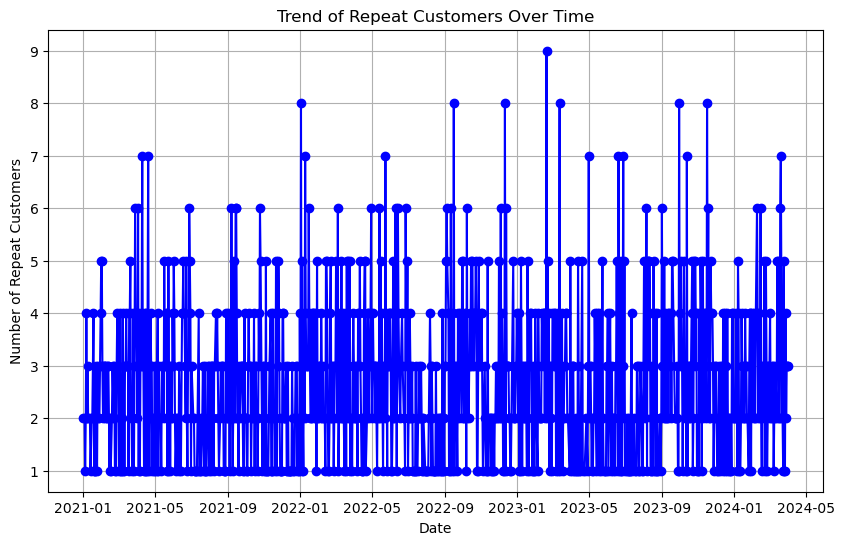

In [36]:
# Filter the DataFrame to include only repeat customers
repeat_customers_df = sales_df[sales_df['Customer Type'] == 'Repeat Customer']

# Count the number of repeat customers for each date
repeat_customers_by_date = repeat_customers_df.groupby('Date').size()

# Plot the trend of repeat customers over time
plt.figure(figsize=(10, 6))
repeat_customers_by_date.plot(kind='line', marker='o', color='b')
plt.title('Trend of Repeat Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Repeat Customers')
plt.grid(True)
plt.show()


In [80]:
print(sales_df['Customer Type'].value_counts())

Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


In [81]:
sales_df_filtered = sales_df.dropna(subset=['Customer Type'])

Month                0
Customer ID          0
Age Group            0
Region               0
Race/Ethnicity    1499
Income Group         0
Language             0
Category             0
Date                 0
Customer Type        0
dtype: int64
Month                  period[M]
Customer ID               object
Age Group                 object
Region                    object
Race/Ethnicity            object
Income Group              object
Language                  object
Category                  object
Date              datetime64[ns]
Customer Type             object
dtype: object
count        5918
unique         39
top       2023-11
freq          196
Name: Month, dtype: object
Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


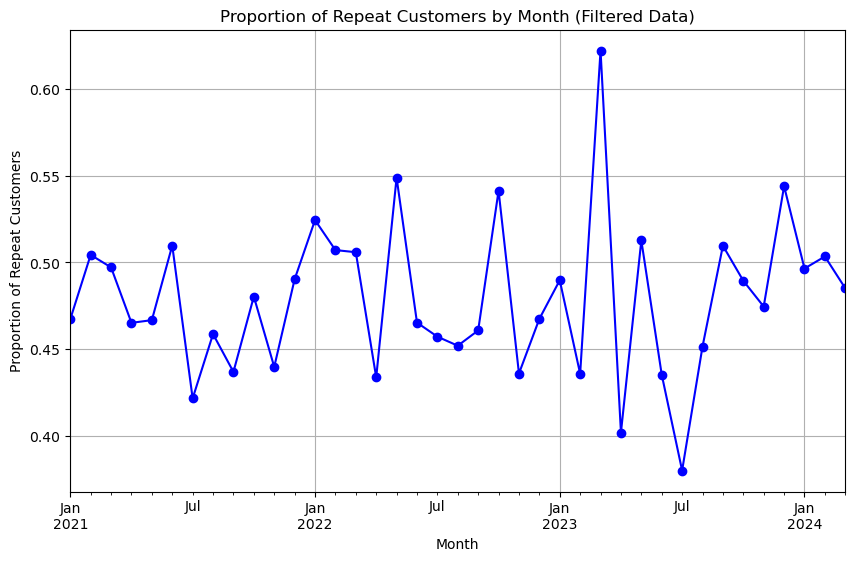

In [83]:

# 'sales_df' is your original DataFrame and you want to filter rows
# where 'Customer Type' isn't missing:
sales_df_filtered = sales_df.dropna(subset=['Customer Type'])

# Check for missing values in 'sales_df_filtered'
print(sales_df_filtered.isnull().sum())  # Check for any remaining missing values

# Check data types of relevant columns
print(sales_df_filtered.dtypes)  # Check data types of 'Month' and 'Customer Type'

# Explore descriptive statistics (optional)
print(sales_df_filtered['Month'].describe())  # Describe 'Month' (if numerical)
print(sales_df_filtered['Customer Type'].value_counts())  # Count occurrences of each value

# Calculate monthly proportion of repeat customers
repeat_customer_prop = (
    sales_df_filtered.groupby('Month')['Customer Type']
    .apply(lambda x: x.eq('Repeat Customer').mean())
)

# Plot the proportion
plt.figure(figsize=(10, 6))
repeat_customer_prop.plot(marker='o', linestyle='-', color='blue')

# Since regression analysis isn't suitable, comment out the line below:
# # This would be incorrect to use with binary data
# # sns.regplot(x='Month', y=repeat_customer_prop, data=sales_df_filtered)

plt.xlabel('Month')
plt.ylabel('Proportion of Repeat Customers')
plt.title('Proportion of Repeat Customers by Month (Filtered Data)')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [84]:
print(sales_df['Customer Type'].value_counts())

Customer Type
nan                3081
Repeat Customer    2837
Name: count, dtype: int64


In [87]:
sales_df['Repeat Customers'] = np.where(sales_df['Customer Type'] == 'Repeat Customer', 1, 0)
print(sales_df.head())  # Check that the new column has been created

     Month Customer ID Age Group     Region      Race/Ethnicity  \
0  2021-01       C3810       65+    Midwest  Hispanic or Latino   
1  2021-01       C3602     25-34       West     Native American   
2  2021-01       C2397     25-34  Northeast     Native American   
3  2021-01       C7764     35-44      South               Asian   
4  2021-01       C7763     18-24      South                None   

        Income Group Language                           Category       Date  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers  
0  Repeat Customer                 1  
1              nan                 0  
2  Re

In [88]:
sales_df.head

<bound method NDFrame.head of         Month Customer ID Age Group     Region      Race/Ethnicity  \
0     2021-01       C3810       65+    Midwest  Hispanic or Latino   
1     2021-01       C3602     25-34       West     Native American   
2     2021-01       C2397     25-34  Northeast     Native American   
3     2021-01       C7764     35-44      South               Asian   
4     2021-01       C7763     18-24      South                None   
...       ...         ...       ...        ...                 ...   
5913  2024-03       C9606     45-64      South     Native American   
5914  2024-03       C7906     18-24      South               White   
5915  2024-03       C8224       65+       West               Asian   
5916  2024-03       C1180     45-64       West  Hispanic or Latino   
5917  2024-03       C3803     25-34  Northeast               White   

           Income Group Language  \
0     $50,000 - $75,000  English   
1             < $25,000  English   
2             < $25,0

In [89]:
columns_list = sales_df.columns.tolist()
print(columns_list)

['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language', 'Category', 'Date', 'Customer Type', 'Repeat Customers']


In [90]:
print(sales_df['Category'].head())

0    [Ladies' Hats, Clothing Articles]
1                      [Men's Fashion]
2           [Ladies' Hats, Hats, Hats]
3                       [Shoes, Shoes]
4     [Hats, Clothing Articles, Shoes]
Name: Category, dtype: object


In [91]:
def clean_category(category_list):
    """Extracts the first item before the comma from a list."""
    if not category_list:
        return None  # Handle empty lists
    
    # Split at comma, consider the first item only
    first_item = category_list[0].split(',', 1)[0]
    return first_item

# Apply the cleaning function to the 'Category' column (entire column)
sales_df['Clean Category'] = sales_df['Category'].apply(clean_category)

# Get the unique values in the 'Clean Category' column
unique_categories = sales_df['Clean Category'].unique()

# Print the unique values
print(unique_categories)

["Ladies' Hats" "Men's Fashion" 'Shoes' 'Hats' "Women's Fashion"
 'Clothing Articles']


In [92]:
unique_categories

array(["Ladies' Hats", "Men's Fashion", 'Shoes', 'Hats',
       "Women's Fashion", 'Clothing Articles'], dtype=object)

In [94]:
print(sales_df['Clean Category'].head())

0     Ladies' Hats
1    Men's Fashion
2     Ladies' Hats
3            Shoes
4             Hats
Name: Clean Category, dtype: object


In [95]:
sales_df

,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Category,Date,Customer Type,Repeat Customers,Clean Category
0,2021-01,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[Ladies' Hats, Clothing Articles]",2021-01-26,Repeat Customer,1,Ladies' Hats
1,2021-01,C3602,25-34,West,Native American,"< $25,000",English,[Men's Fashion],2021-01-05,nan,0,Men's Fashion
2,2021-01,C2397,25-34,Northeast,Native American,"< $25,000",English,"[Ladies' Hats, Hats, Hats]",2021-01-31,Repeat Customer,1,Ladies' Hats
3,2021-01,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[Shoes, Shoes]",2021-01-25,nan,0,Shoes
4,2021-01,C7763,18-24,South,None,"$50,000 - $75,000",English,"[Hats, Clothing Articles, Shoes]",2021-01-03,nan,0,Hats
...,...,...,...,...,...,...,...,...,...,...,...,...
5913,2024-03,C9606,45-64,South,Native American,"$75,000+",English,"[Ladies' Hats, Women's Fashion, Hats]",2024-03-18,nan,0,Ladies' Hats
5914,2024-03,C7906,18-24,South,White,"< $25,000",English,[Ladies' Hats],2024-03-01,Repeat Customer,1,Ladies' Hats
5915,2024-03,C8224,65+,West,Asian,"$50,000 - $75,000",English,[Ladies' Hats],2024-03-24,Repeat Customer,1,Ladies' Hats
5916,2024-03,C1180,45-64,West,Hispanic or Latino,"$75,000+",English,"[Hats, Ladies' Hats]",2024-03-16,nan,0,Hats


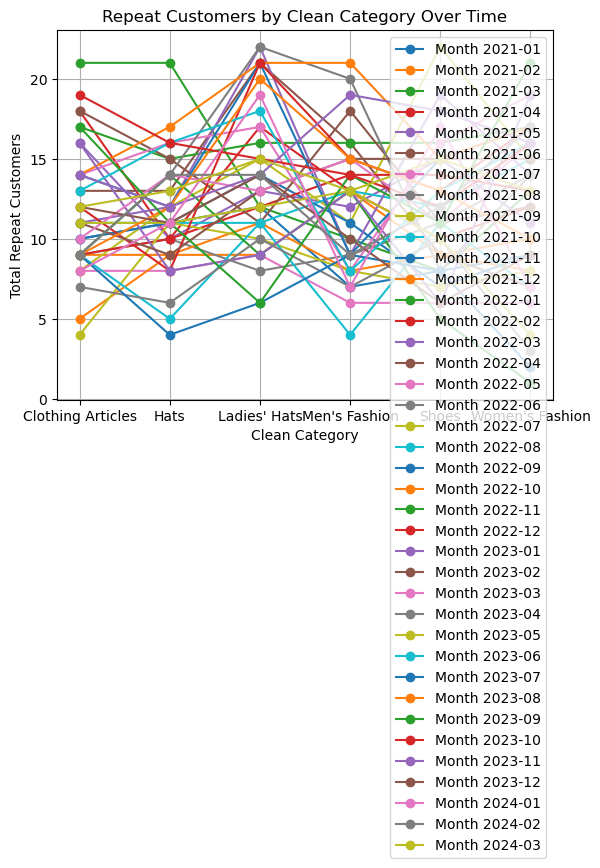

In [96]:
# Group data by 'Month' and 'Clean Category' and calculate the sum of 'Repeat Customers'
repeat_customers_by_category = (
    sales_df.groupby(['Month', 'Clean Category'])['Repeat Customers']
    .sum()
    .reset_index()
)

# Get the unique months
unique_months = sales_df['Month'].unique()

# Define a function to plot the data for each month
def plot_month_data(month):
    data_for_month = repeat_customers_by_category[repeat_customers_by_category['Month'] == month]
    plt.plot(data_for_month['Clean Category'], data_for_month['Repeat Customers'], marker='o', label=f'Month {month}')

# Plot the data for each month
for month in unique_months:
    plot_month_data(month)

# Add labels and title
plt.xlabel('Clean Category')
plt.ylabel('Total Repeat Customers')
plt.title('Repeat Customers by Clean Category Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
repeat_customers_by_month

,level_0,index,Month,0
0,0,0,2021-01-01,57
1,1,1,2021-02-01,59
2,2,2,2021-03-01,85
3,3,3,2021-04-01,80
4,4,4,2021-05-01,77
5,5,5,2021-06-01,79
6,6,6,2021-07-01,43
7,7,7,2021-08-01,61
8,8,8,2021-09-01,83
9,9,9,2021-10-01,73


What item categories have repeat customers bought over time?

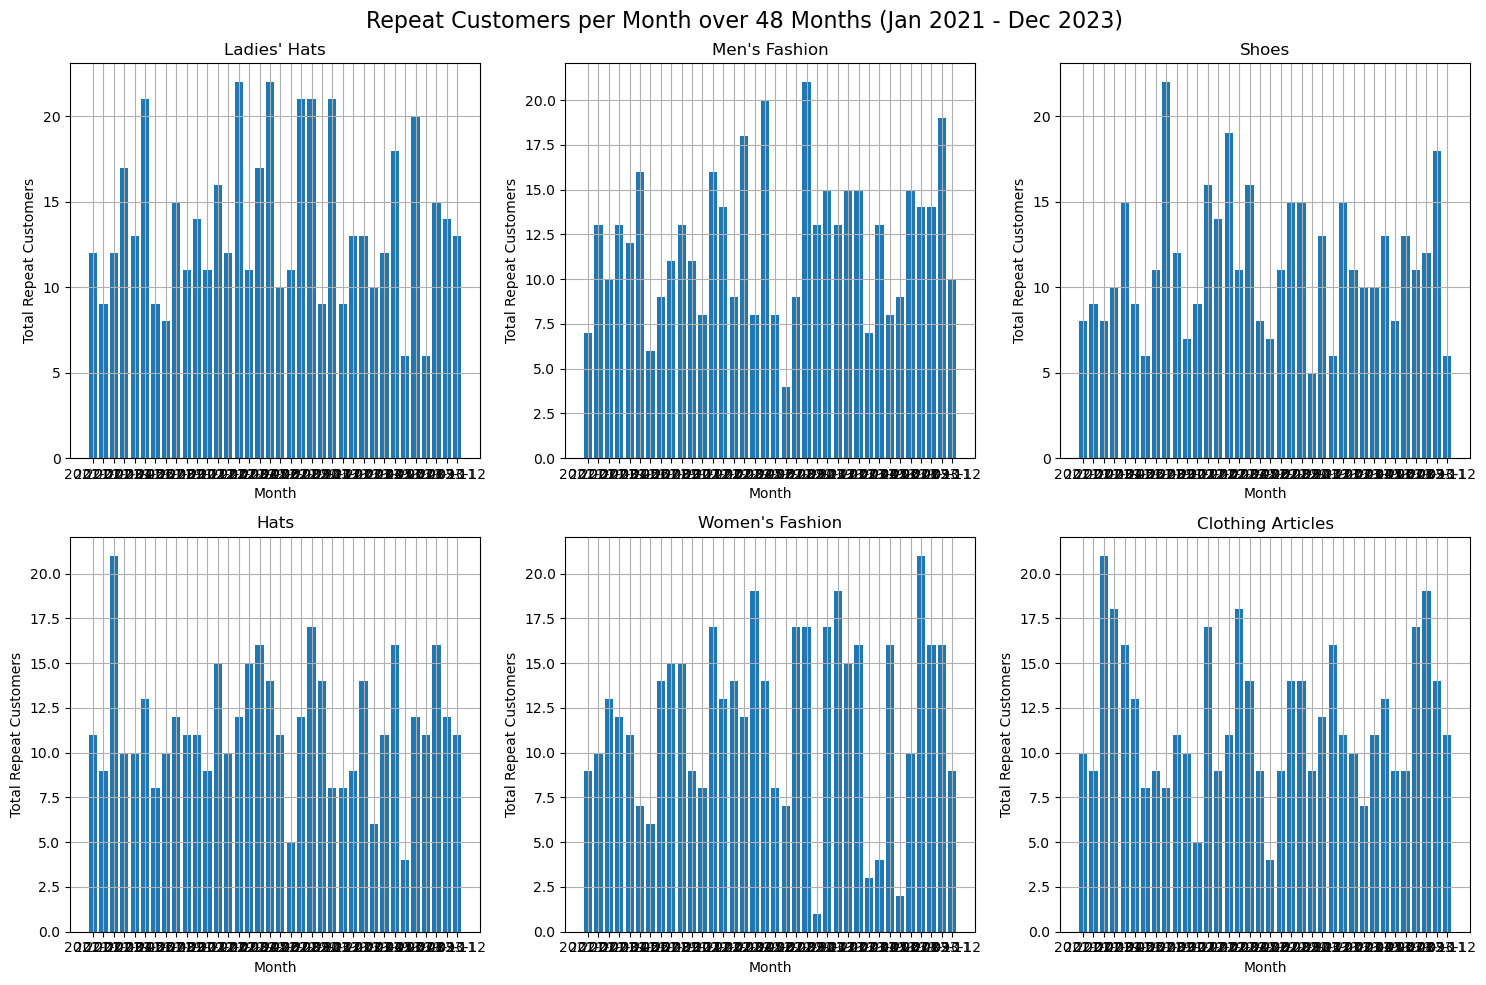

In [103]:
# Get the unique categories
unique_categories = sales_df['Clean Category'].unique()

# Define the desired date range (inclusive) - adjust for 48 months
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')  # Adjust for 48 months

# Create a figure with 2 rows and 3 columns (6 charts)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figure size as needed

# Loop through each category and subplot
for i, category in enumerate(unique_categories):
    # Filter data for the current category and date range
    category_data = sales_df[
        (sales_df['Clean Category'] == category) & (sales_df['Date'] >= start_date) & (sales_df['Date'] < end_date)
    ]

    # Resample data by month and sum repeat customers
    monthly_repeat_customers = category_data.resample('M', on='Date')['Repeat Customers'].sum()

    # Convert the index (dates) to strings for the x-axis labels
    monthly_repeat_customers.index = monthly_repeat_customers.index.strftime('%Y-%m')

    # Plot the bar chart on the current subplot
    axes[i // 3, i % 3].bar(monthly_repeat_customers.index, monthly_repeat_customers.values)

    # Add labels and title for each subplot
    axes[i // 3, i % 3].set_xlabel('Month')
    axes[i // 3, i % 3].set_ylabel('Total Repeat Customers')
    axes[i // 3, i % 3].set_title(f'{category}')
    axes[i // 3, i % 3].grid(True)

# Adjust overall layout (optional)
fig.suptitle('Repeat Customers per Month over 48 Months (Jan 2021 - Dec 2023)', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [105]:
# Focus on specific columns
selected_columns = ['Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language']
data_types = sales_df[selected_columns].dtypes

# Print the results
print(data_types)

Age Group         object
Region            object
Race/Ethnicity    object
Income Group      object
Language          object
dtype: object


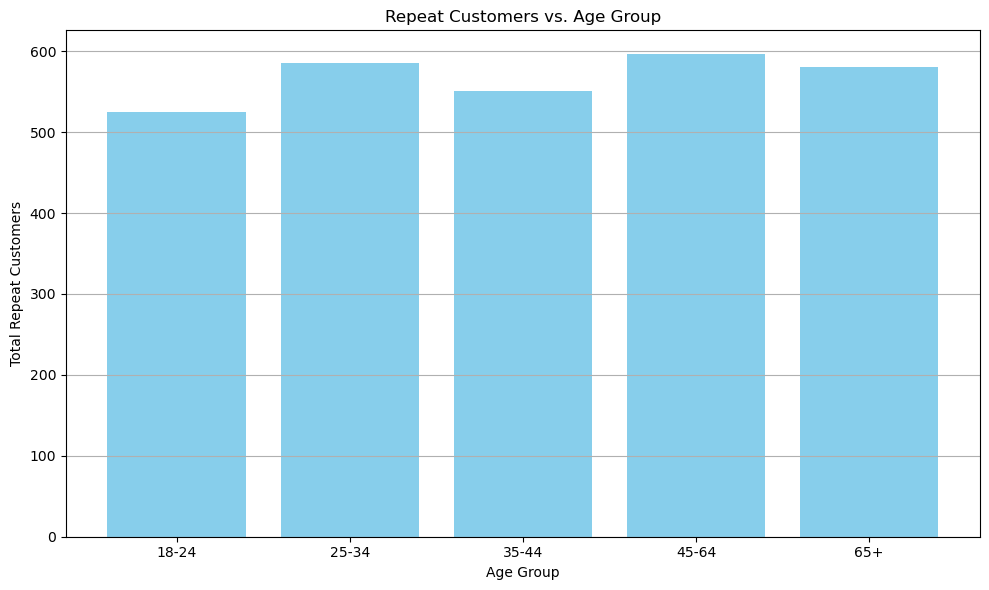

In [112]:
# Define age groups (modify if needed)
age_groups = ['18-24', '25-34', '35-44', '45-64', '65+']

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Group data by "Age Group" and aggregate "Repeat Customers" sum
age_group_data = (
    sales_df.groupby("Age Group")["Repeat Customers"].sum().reset_index()
)

# Create bars for each age group
plt.bar(age_group_data["Age Group"], age_group_data["Repeat Customers"], color='skyblue')

# Add labels, title, and grid
plt.xlabel("Age Group")
plt.ylabel("Total Repeat Customers")
plt.title("Repeat Customers vs. Age Group")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

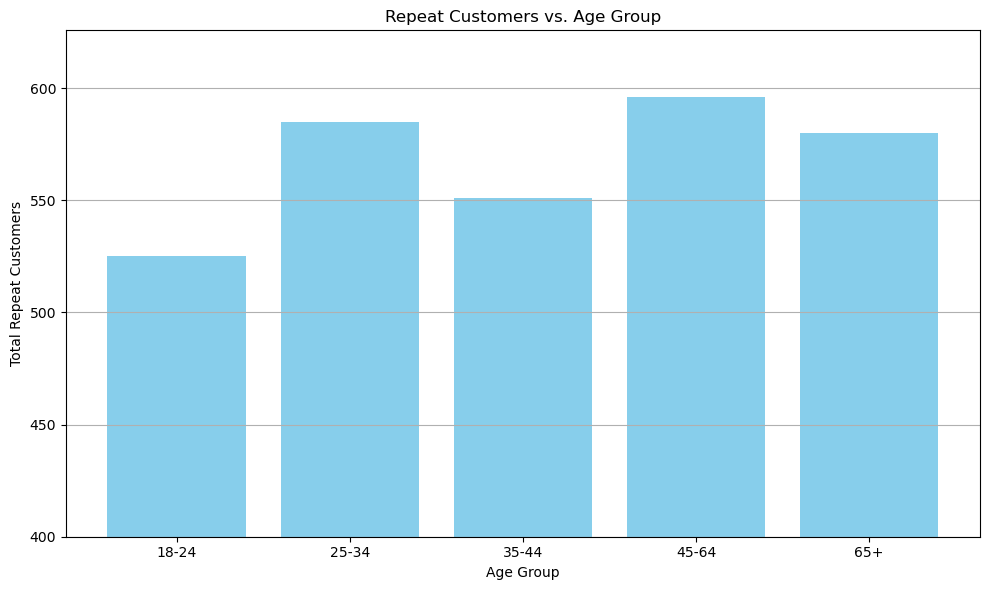

In [114]:
# Define age groups (modify if needed)
age_groups = ['18-24', '25-34', '35-44', '45-64', '65+']

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Group data by "Age Group" and aggregate "Repeat Customers" sum
age_group_data = (
    sales_df.groupby("Age Group")["Repeat Customers"].sum().reset_index()
)

# Create bars for each age group
plt.bar(age_group_data["Age Group"], age_group_data["Repeat Customers"], color='skyblue')

# Adjust y-axis limits (starting at 300)
plt.ylim(bottom=400)  # Change the value as needed

# Add labels, title, and grid
plt.xlabel("Age Group")
plt.ylabel("Total Repeat Customers")
plt.title("Repeat Customers vs. Age Group")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability

# Display the plot
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

In [122]:
print(sales_df.head())

     Month Customer ID Age Group     Region      Race/Ethnicity  \
0  2021-01       C3810       65+    Midwest  Hispanic or Latino   
1  2021-01       C3602     25-34       West     Native American   
2  2021-01       C2397     25-34  Northeast     Native American   
3  2021-01       C7764     35-44      South               Asian   
4  2021-01       C7763     18-24      South                None   

        Income Group Language                           Category       Date  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers Clean Category  
0  Repeat Customer                 1   Ladies' Hats  
1             

C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\2516944384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df["Month"] = repeat_customers_df["Month"].astype(str)
C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\2516944384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df["Month"] = pd.to_datetime(repeat_customers_df["Month"])
C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\2516944384.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

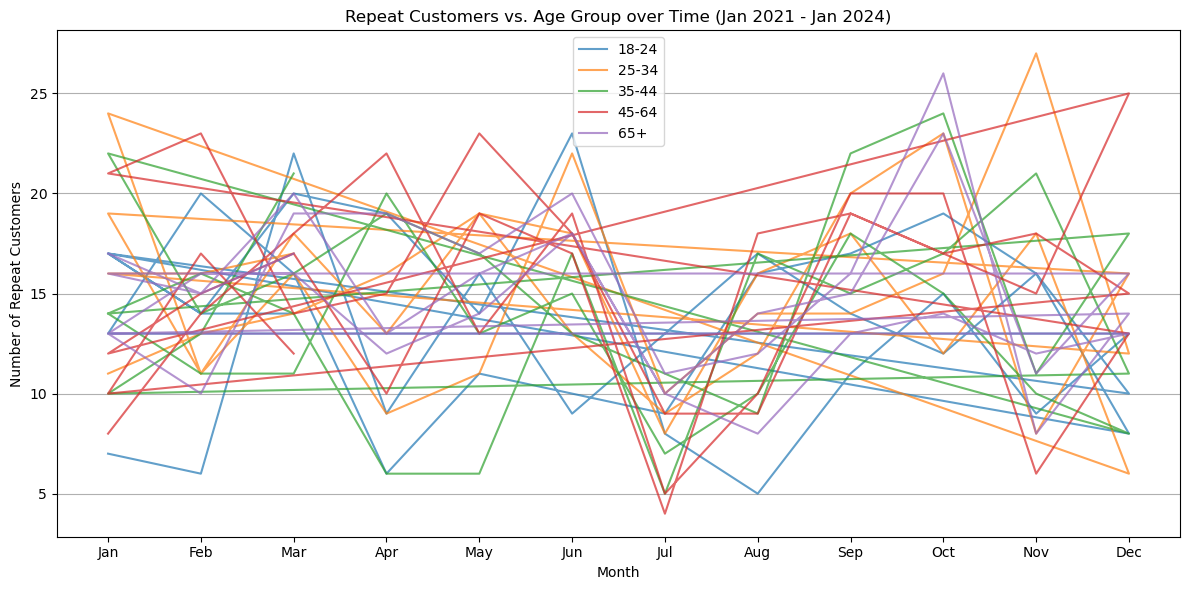

In [135]:
# Filter data for repeat customers
repeat_customers_df = sales_df[sales_df["Repeat Customers"] == 1]

# Convert "Month" column to string format first
repeat_customers_df["Month"] = repeat_customers_df["Month"].astype(str)

# Convert "Month" column to datetime format
repeat_customers_df["Month"] = pd.to_datetime(repeat_customers_df["Month"])

# Extract year and month information
repeat_customers_df["Year"] = repeat_customers_df["Month"].dt.year
repeat_customers_df["Month"] = repeat_customers_df["Month"].dt.month

# Resample data by month and calculate the count of repeat customers per age group
monthly_data = (
    repeat_customers_df.groupby(["Year", "Month", "Age Group"])["Customer ID"]
    .count()
    .unstack(fill_value=0)
    .reset_index()
)

# Define the time period
start_year = 2021
end_year = 2024

# Filter data by desired time period
monthly_data = monthly_data[
    (monthly_data["Year"] >= start_year) & (monthly_data["Year"] <= end_year)
]

# Create the plot
plt.figure(figsize=(12, 6))

# Loop through each age group and create a line with transparency
for col in monthly_data.columns[2:]:  # Skip the first two columns ("Year" and "Month")
    plt.plot(
        monthly_data["Month"],
        monthly_data[col],
        label=col,  # Set label as age group
        alpha=0.7,  # Apply transparency
    )

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Number of Repeat Customers")
plt.title("Repeat Customers vs. Age Group over Time (Jan 2021 - Jan 2024)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis ticks to month names
plt.legend()
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [154]:

# Filter data for repeat customers
repeat_customers_df = sales_df[sales_df["Repeat Customers"] == 1].copy()

# Convert "Month" column to datetime format
repeat_customers_df["Month"] = pd.to_datetime(repeat_customers_df["Month"].astype(str))

# Extract year and month information
repeat_customers_df["Year"] = repeat_customers_df["Month"].dt.year
repeat_customers_df["Month"] = repeat_customers_df["Month"].dt.month


In [158]:
# Convert "Month" column to datetime format
repeat_customers_df["Month"] = pd.to_datetime(repeat_customers_df["Month"], format='%m')

# Extract year and month information
repeat_customers_df["Year"] = repeat_customers_df["Month"].dt.year
repeat_customers_df["Month"] = repeat_customers_df["Month"].dt.month

In [174]:
# Group by Year, Month, and Age Group and count the number of repeat customers
# heatmap_data = repeat_customers_df.groupby(['Year', 'Month', 'Age Group']).size().unstack(fill_value=0)

# Create the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
# plt.title('Number of Repeat Customers by Age Group Over Time')
# plt.xlabel('Age Group')
# plt.ylabel('Year-Month')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [171]:
# Filter data for repeat customers
repeat_customers_df = sales_df[sales_df["Repeat Customers"] == 1]

# Convert 'Date' column to datetime format
repeat_customers_df['Date'] = pd.to_datetime(repeat_customers_df['Date'])

# Extract year and month information
repeat_customers_df['Year'] = repeat_customers_df['Date'].dt.year
repeat_customers_df['Month'] = repeat_customers_df['Date'].dt.month

# Resample data by month and calculate the count of repeat customers per age group
monthly_data = (
    repeat_customers_df.groupby(["Year", "Month", "Age Group"])["Customer ID"]
    .count()
    .unstack(fill_value=0)
    .reset_index()
)


C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\108475301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df['Date'] = pd.to_datetime(repeat_customers_df['Date'])
C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\108475301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df['Year'] = repeat_customers_df['Date'].dt.year
C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\108475301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [172]:
monthly_data

Age Group,Year,Month,18-24,25-34,35-44,45-64,65+
0,2021,1,7,11,14,8,17
1,2021,2,6,13,11,14,15
2,2021,3,22,14,11,18,20
3,2021,4,9,16,20,22,13
4,2021,5,16,19,13,13,16
5,2021,6,9,18,15,19,18
6,2021,7,13,8,7,5,10
7,2021,8,17,16,10,10,8
8,2021,9,14,18,18,20,13
9,2021,10,12,12,15,20,14


ValueError: The number of FixedLocator locations (39), usually from a call to set_ticks, does not match the number of labels (36).

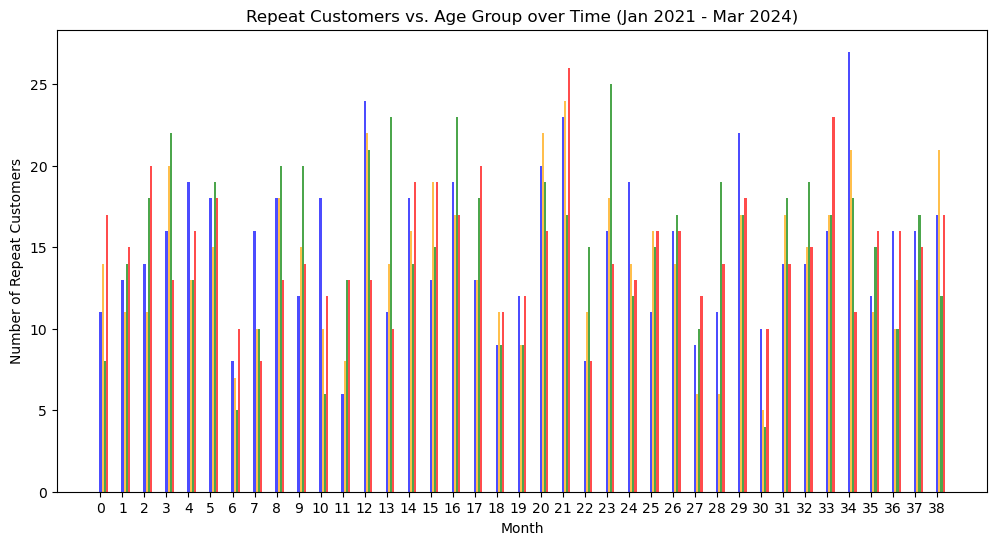

In [173]:
# Create the plot
plt.figure(figsize=(12, 6))

# Loop through each age group and create a bar for each month
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, col in enumerate(monthly_data.columns[3:]):  # Skip the first three columns ("Year", "Month", "Age Group")
    plt.bar(
        monthly_data.index + i * 0.1,  # Add a small offset to each bar for better visibility
        monthly_data[col],
        width=0.1,
        label=col,  # Set label as age group
        color=colors[i],
        alpha=0.7,  # Apply transparency
    )

# Add labels, title, and legend
plt.xlabel("Month")
plt.ylabel("Number of Repeat Customers")
plt.title("Repeat Customers vs. Age Group over Time (Jan 2021 - Mar 2024)")
plt.xticks(monthly_data.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * 3)  # Set x-axis ticks to month names
plt.legend(title="Age Group")
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()

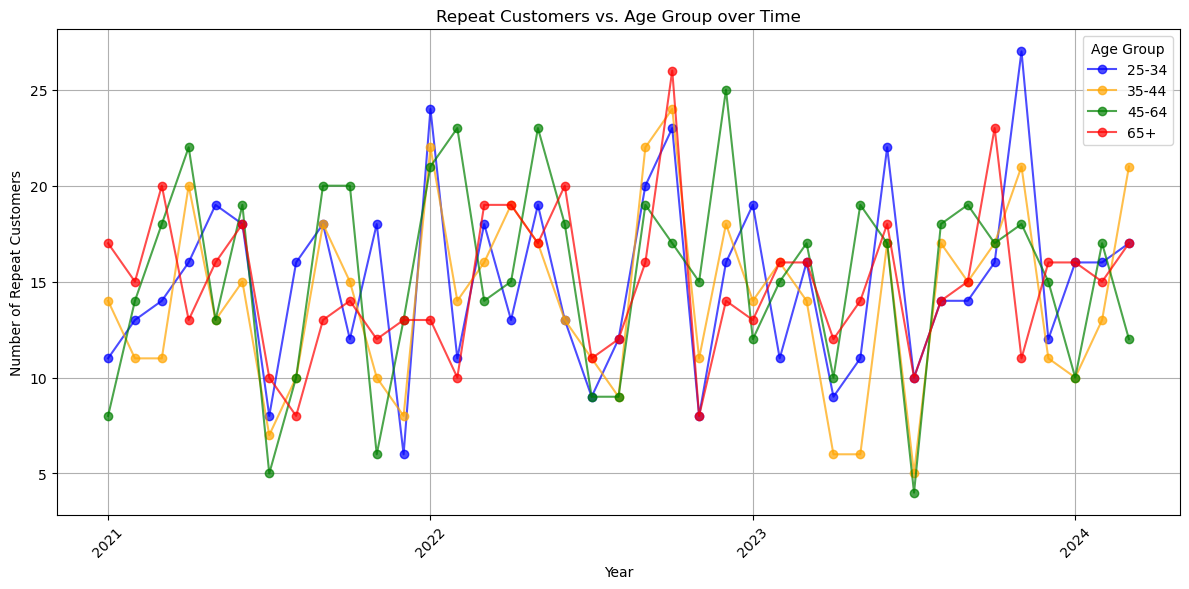

In [178]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Loop through each age group and create a line plot for each
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, col in enumerate(monthly_data.columns[3:]):  # Skip the first three columns ("Year", "Month", "Age Group")
    plt.plot(
        monthly_data["Year"] + (monthly_data["Month"] - 1) / 12,  # Convert month to fraction of year
        monthly_data[col],
        label=col,  # Set label as age group
        color=colors[i],
        marker='o',  # Add markers for each data point
        alpha=0.7,  # Apply transparency
    )

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Number of Repeat Customers")
plt.title("Repeat Customers vs. Age Group over Time")
plt.xticks(range(monthly_data["Year"].min(), monthly_data["Year"].max() + 1), rotation=45)  # Set x-axis ticks to years
plt.legend(title="Age Group")
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [186]:
print(monthly_data.columns)


Index(['Year', 'Month', '18-24', '25-34', '35-44', '45-64', '65+'], dtype='object', name='Age Group')


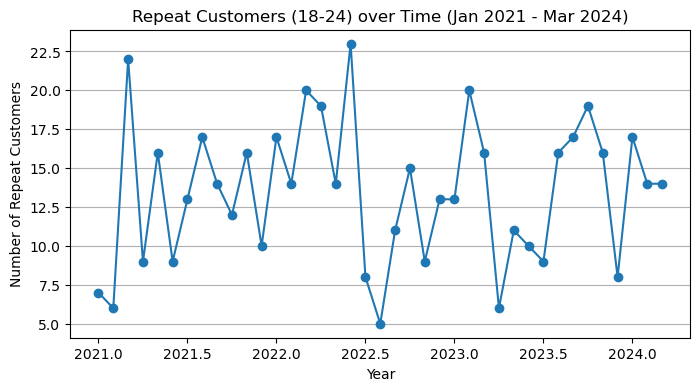

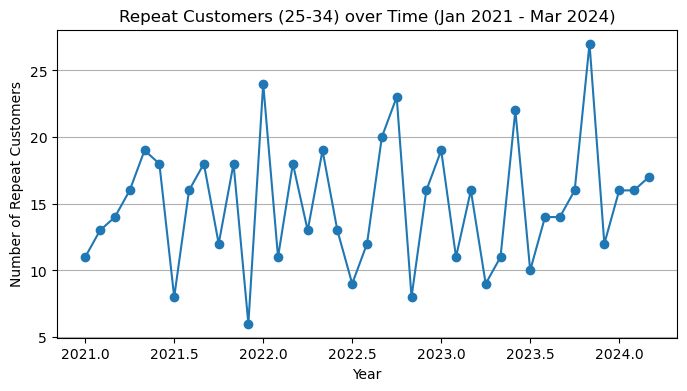

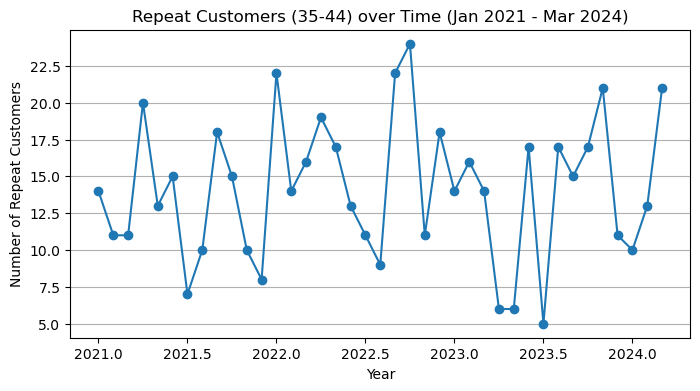

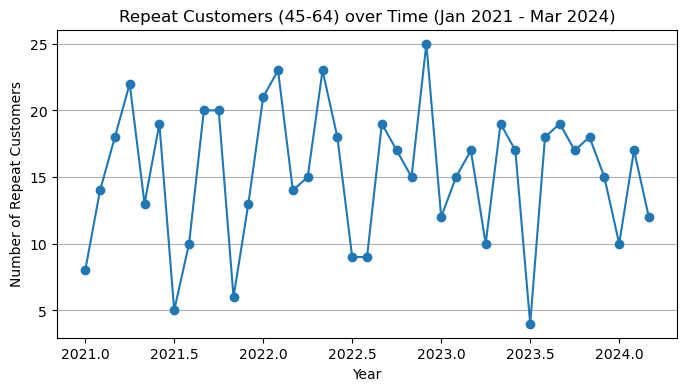

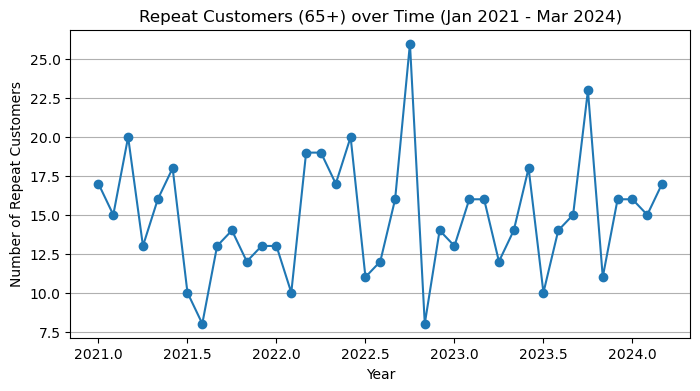

In [187]:
# List of age groups
age_groups = ['18-24', '25-34', '35-44', '45-64', '65+']

# Iterate over each age group
for age_group in age_groups:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    # Plot data for the current age group
    plt.plot(
        monthly_data["Year"] + (monthly_data["Month"] - 1) / 12,  # Convert month to fraction of year
        monthly_data[age_group],  # Select data for the current age group
        marker='o',  # Add markers for each data point
    )
    
    plt.xlabel("Year")
    plt.ylabel("Number of Repeat Customers")
    plt.title(f"Repeat Customers ({age_group}) over Time (Jan 2021 - Mar 2024)")
    plt.grid(axis='y')  # Add grid lines for better readability
    plt.show()

In [188]:
# Display information about columns, data types, and content in sales_df
print("Columns:")
print(sales_df.columns)

print("\nData types:")
print(sales_df.dtypes)

print("\nContent:")
print(sales_df.head())  # Display the first few rows of the DataFrame


Columns:
Index(['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity',
       'Income Group', 'Language', 'Category', 'Date', 'Customer Type',
       'Repeat Customers', 'Clean Category'],
      dtype='object')

Data types:
Month                    period[M]
Customer ID                 object
Age Group                   object
Region                      object
Race/Ethnicity              object
Income Group                object
Language                    object
Category                    object
Date                datetime64[ns]
Customer Type               object
Repeat Customers             int32
Clean Category              object
dtype: object

Content:
     Month Customer ID Age Group     Region      Race/Ethnicity  \
0  2021-01       C3810       65+    Midwest  Hispanic or Latino   
1  2021-01       C3602     25-34       West     Native American   
2  2021-01       C2397     25-34  Northeast     Native American   
3  2021-01       C7764     35-44      South           

In [201]:
unique_regions = sales_df['Region'].unique()
print(unique_regions)


['Midwest' 'West' 'Northeast' 'South']


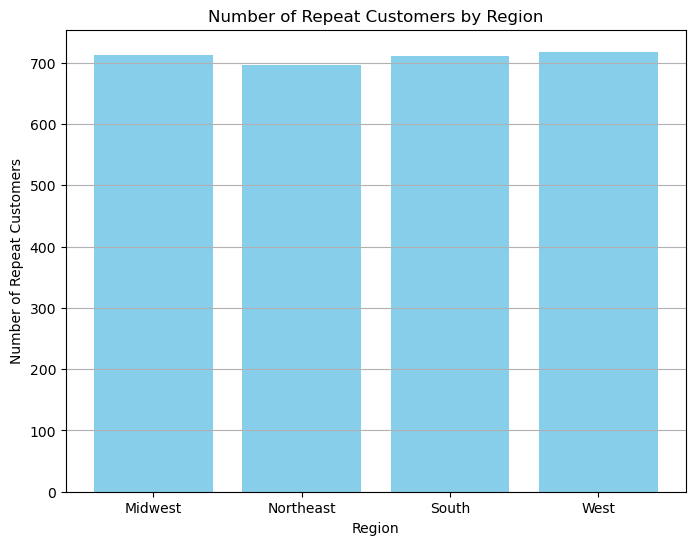

In [202]:
# Aggregate repeat customer data by region
region_data = sales_df.groupby('Region')['Repeat Customers'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(region_data['Region'], region_data['Repeat Customers'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Repeat Customers')
plt.title('Number of Repeat Customers by Region')
plt.grid(axis='y')

plt.show()


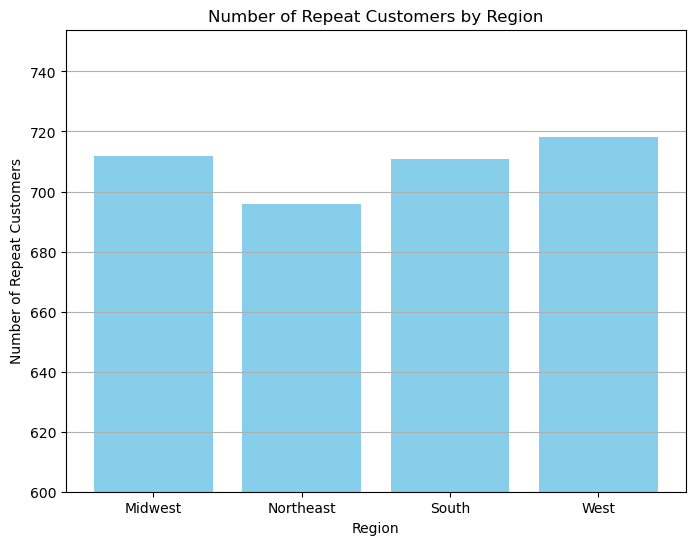

In [203]:
# Aggregate repeat customer data by region
region_data = sales_df.groupby('Region')['Repeat Customers'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(region_data['Region'], region_data['Repeat Customers'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Repeat Customers')
plt.title('Number of Repeat Customers by Region')
plt.grid(axis='y')
plt.ylim(600, None)  # Set y-axis limits to start from 600

plt.show()

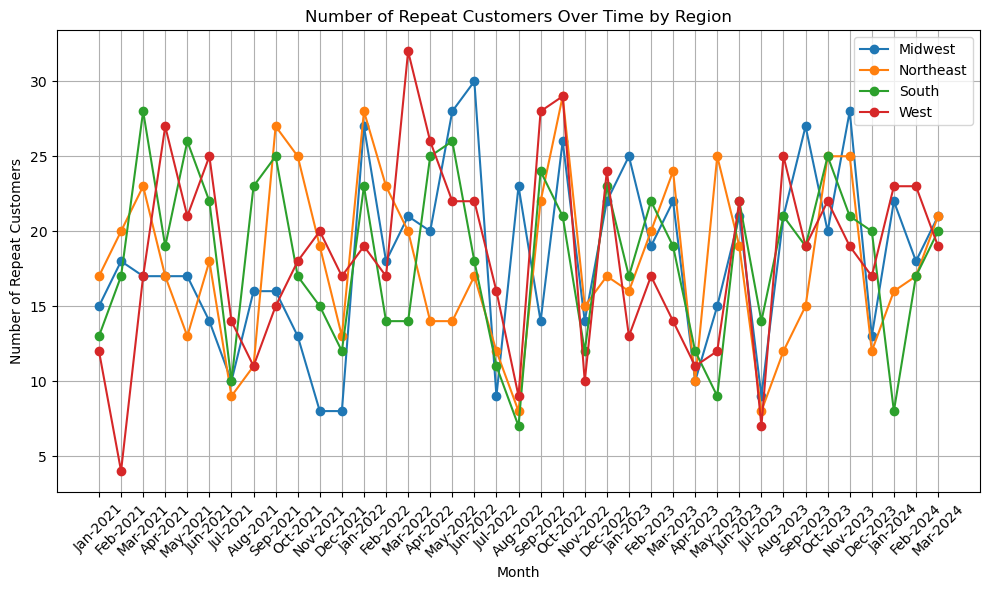

In [207]:
# Group sales data by month and region and sum the number of repeat customers
monthly_region_data = sales_df.groupby(['Month', 'Region'])['Repeat Customers'].sum().unstack()

# Convert Period index to string format (Month-Year)
monthly_region_data.index = monthly_region_data.index.strftime('%b-%Y')

# Plot the line plots for each region
plt.figure(figsize=(10, 6))
for region in monthly_region_data.columns:
    plt.plot(monthly_region_data.index, monthly_region_data[region], marker='o', label=region)

plt.xlabel('Month')
plt.ylabel('Number of Repeat Customers')
plt.title('Number of Repeat Customers Over Time by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

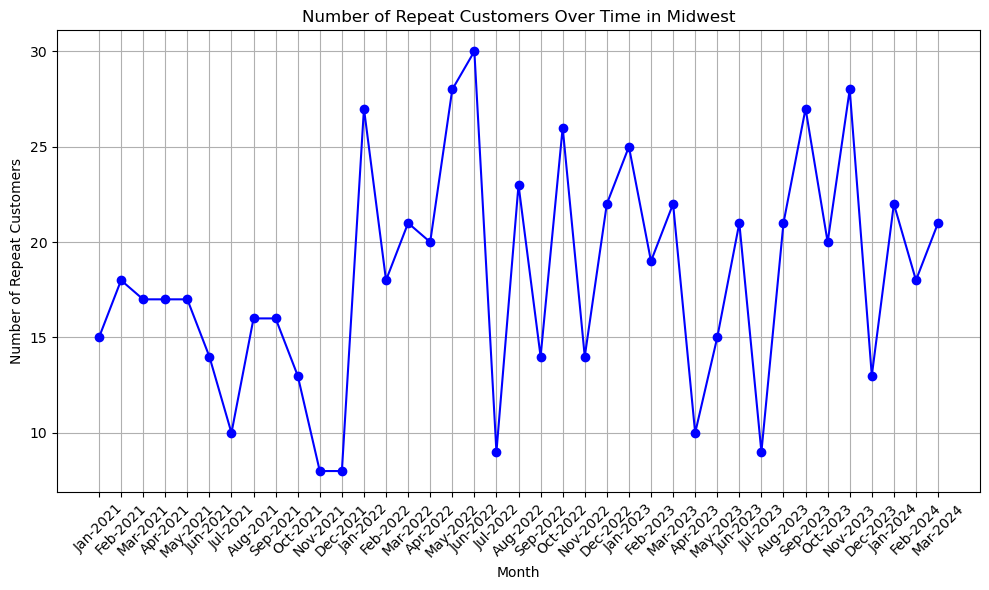

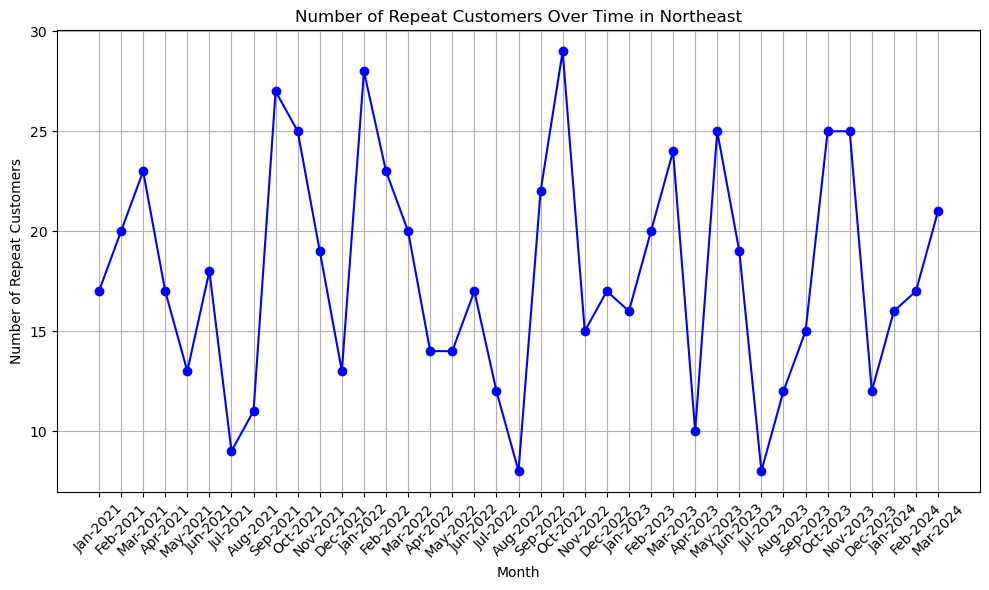

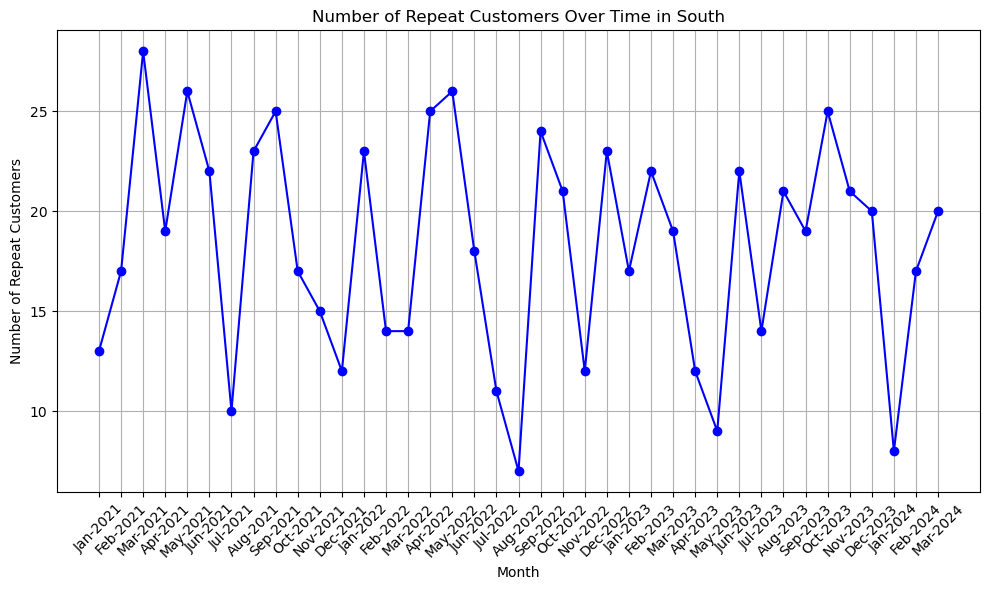

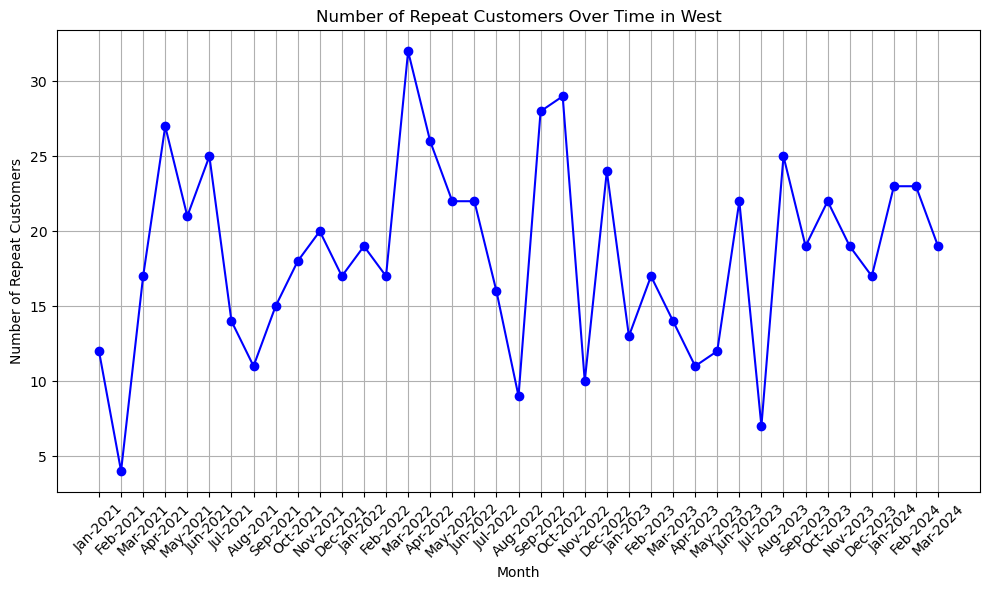

In [209]:
# Group sales data by month and region and sum the number of repeat customers
monthly_region_data = sales_df.groupby(['Month', 'Region'])['Repeat Customers'].sum().unstack()

# Convert Period index to string format (Month-Year)
monthly_region_data.index = monthly_region_data.index.strftime('%b-%Y')

# List of regions
regions = ['Midwest', 'Northeast', 'South', 'West']

# Plot a separate graph for each region
for region in regions:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_region_data.index, monthly_region_data[region], marker='o', color='blue')
    plt.xlabel('Month')
    plt.ylabel('Number of Repeat Customers')
    plt.title(f'Number of Repeat Customers Over Time in {region}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [210]:
unique_race_ethnicity = sales_df['Race/Ethnicity'].unique()
print(unique_race_ethnicity)


['Hispanic or Latino' 'Native American' 'Asian' None 'White'
 'Black or African American' 'Other']


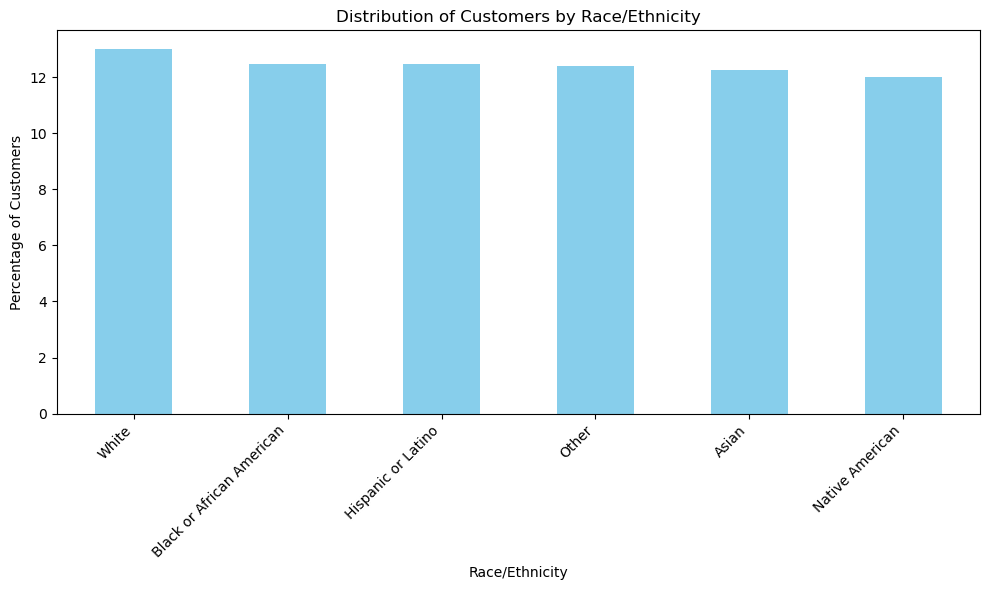

In [211]:
# Calculate the total number of customers
total_customers = len(sales_df)

# Calculate the number of customers in each racial/ethnic group
racial_ethnicity_counts = sales_df['Race/Ethnicity'].value_counts()

# Calculate the percentage of customers in each racial/ethnic group
racial_ethnicity_percentages = (racial_ethnicity_counts / total_customers) * 100

# Plot the distribution of customers by race/ethnicity
plt.figure(figsize=(10, 6))
racial_ethnicity_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

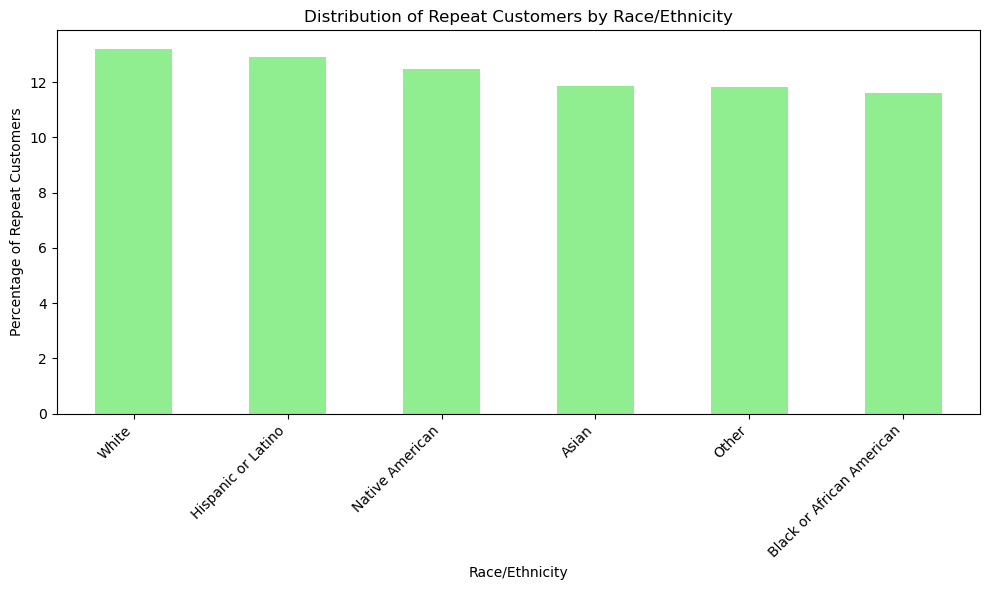

In [212]:
# Calculate the total number of repeat customers
total_repeat_customers = sales_df[sales_df['Repeat Customers'] == 1]['Repeat Customers'].count()

# Calculate the number of repeat customers in each racial/ethnic group
repeat_racial_ethnicity_counts = sales_df[sales_df['Repeat Customers'] == 1]['Race/Ethnicity'].value_counts()

# Calculate the percentage of repeat customers in each racial/ethnic group
repeat_racial_ethnicity_percentages = (repeat_racial_ethnicity_counts / total_repeat_customers) * 100

# Plot the distribution of repeat customers by race/ethnicity
plt.figure(figsize=(10, 6))
repeat_racial_ethnicity_percentages.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Repeat Customers by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Repeat Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


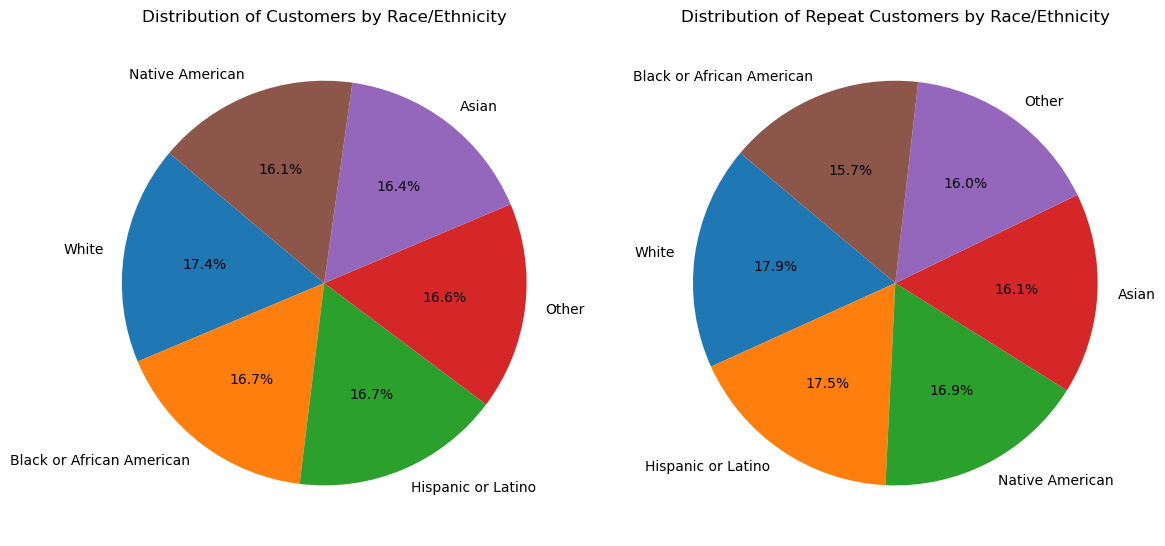

In [213]:
# Calculate the total number of customers
total_customers = len(sales_df)

# Calculate the number of customers in each racial/ethnic group
racial_ethnicity_counts = sales_df['Race/Ethnicity'].value_counts()

# Plot the distribution of customers by race/ethnicity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(racial_ethnicity_counts, labels=racial_ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Race/Ethnicity')

# Calculate the total number of repeat customers
total_repeat_customers = sales_df[sales_df['Repeat Customers'] == 1]['Repeat Customers'].count()

# Calculate the number of repeat customers in each racial/ethnic group
repeat_racial_ethnicity_counts = sales_df[sales_df['Repeat Customers'] == 1]['Race/Ethnicity'].value_counts()

# Plot the distribution of repeat customers by race/ethnicity
plt.subplot(1, 2, 2)
plt.pie(repeat_racial_ethnicity_counts, labels=repeat_racial_ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Repeat Customers by Race/Ethnicity')

plt.tight_layout()
plt.show()


In [214]:
# Display unique values in the 'Income Group' column
unique_income_groups = sales_df['Income Group'].unique()
print("Unique Values in 'Income Group' column:")
print(unique_income_groups)

# Display data type of the 'Income Group' column
data_type_income_group = sales_df['Income Group'].dtype
print("\nData Type of 'Income Group' column:")
print(data_type_income_group)


Unique Values in 'Income Group' column:
['$50,000 - $75,000' '< $25,000' '$25,000 - $50,000' '$75,000+']

Data Type of 'Income Group' column:
object


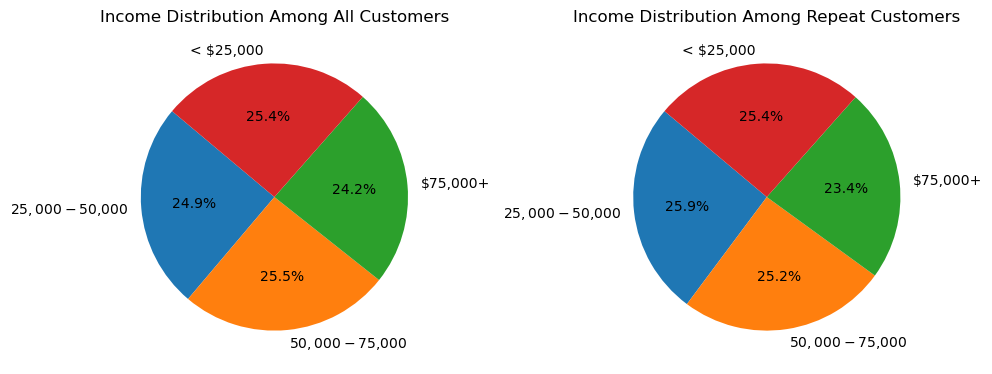

In [215]:
# Group by income group and count the number of customers in each group
customer_income_distribution = sales_df.groupby('Income Group').size()

# Group by income group for repeat customers and count the number of repeat customers in each group
repeat_customer_income_distribution = sales_df[sales_df['Repeat Customers'] == 1].groupby('Income Group').size()

# Plot pie chart for distribution of income among all customers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(customer_income_distribution, labels=customer_income_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution Among All Customers')

# Plot pie chart for distribution of income among repeat customers
plt.subplot(1, 2, 2)
plt.pie(repeat_customer_income_distribution, labels=repeat_customer_income_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution Among Repeat Customers')

plt.tight_layout()
plt.show()


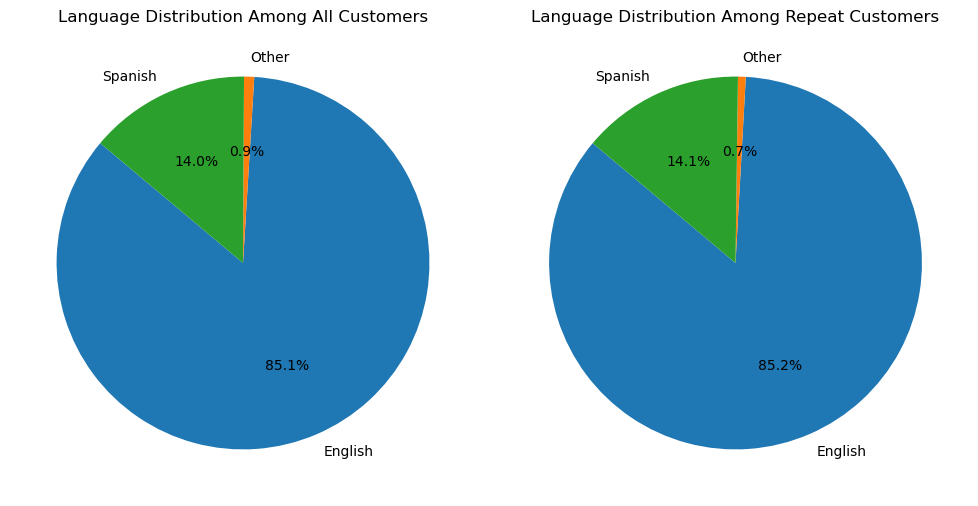

In [216]:
# Group by language and count the number of customers in each language group
customer_language_distribution = sales_df.groupby('Language').size()

# Group by language for repeat customers and count the number of repeat customers in each language group
repeat_customer_language_distribution = sales_df[sales_df['Repeat Customers'] == 1].groupby('Language').size()

# Plot pie chart for distribution of language among all customers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(customer_language_distribution, labels=customer_language_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution Among All Customers')

# Plot pie chart for distribution of language among repeat customers
plt.subplot(1, 2, 2)
plt.pie(repeat_customer_language_distribution, labels=repeat_customer_language_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution Among Repeat Customers')

plt.tight_layout()
plt.show()


C:\Users\rafvr\AppData\Local\Temp\ipykernel_1596\3146138600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_data['Month'] = pd.to_datetime(repeat_customers_data['Month'].astype(str))


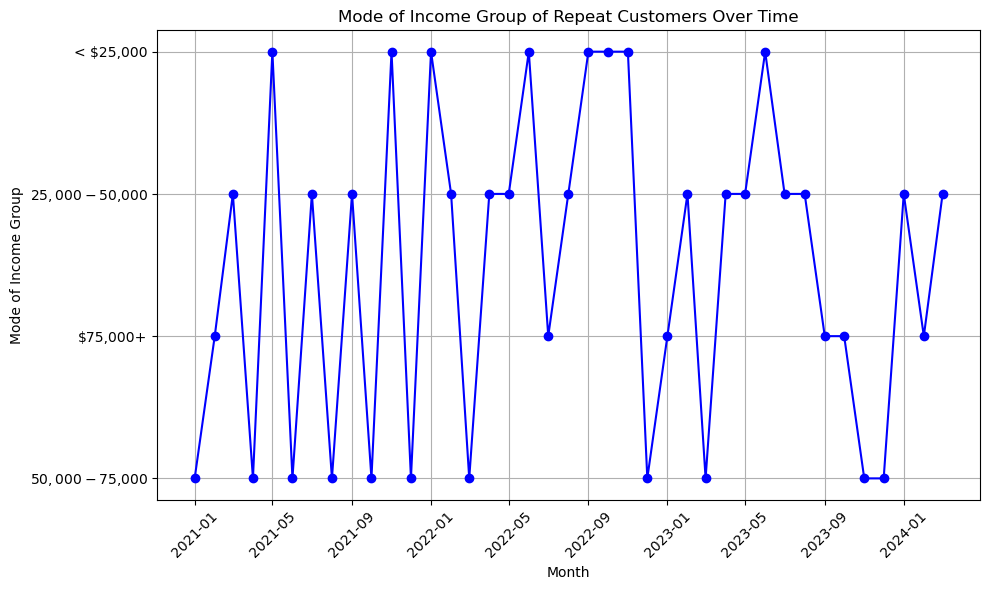

In [218]:
# Filter data for repeat customers
repeat_customers_data = sales_df[sales_df['Repeat Customers'] == 1]

# Convert 'Month' column to datetime type
repeat_customers_data['Month'] = pd.to_datetime(repeat_customers_data['Month'].astype(str))

# Group by month and calculate the mode of income group
monthly_income_mode = repeat_customers_data.groupby('Month')['Income Group'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)

# Plot the trend of mode of income group over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_income_mode.index, monthly_income_mode, marker='o', color='b')
plt.title('Mode of Income Group of Repeat Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Mode of Income Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


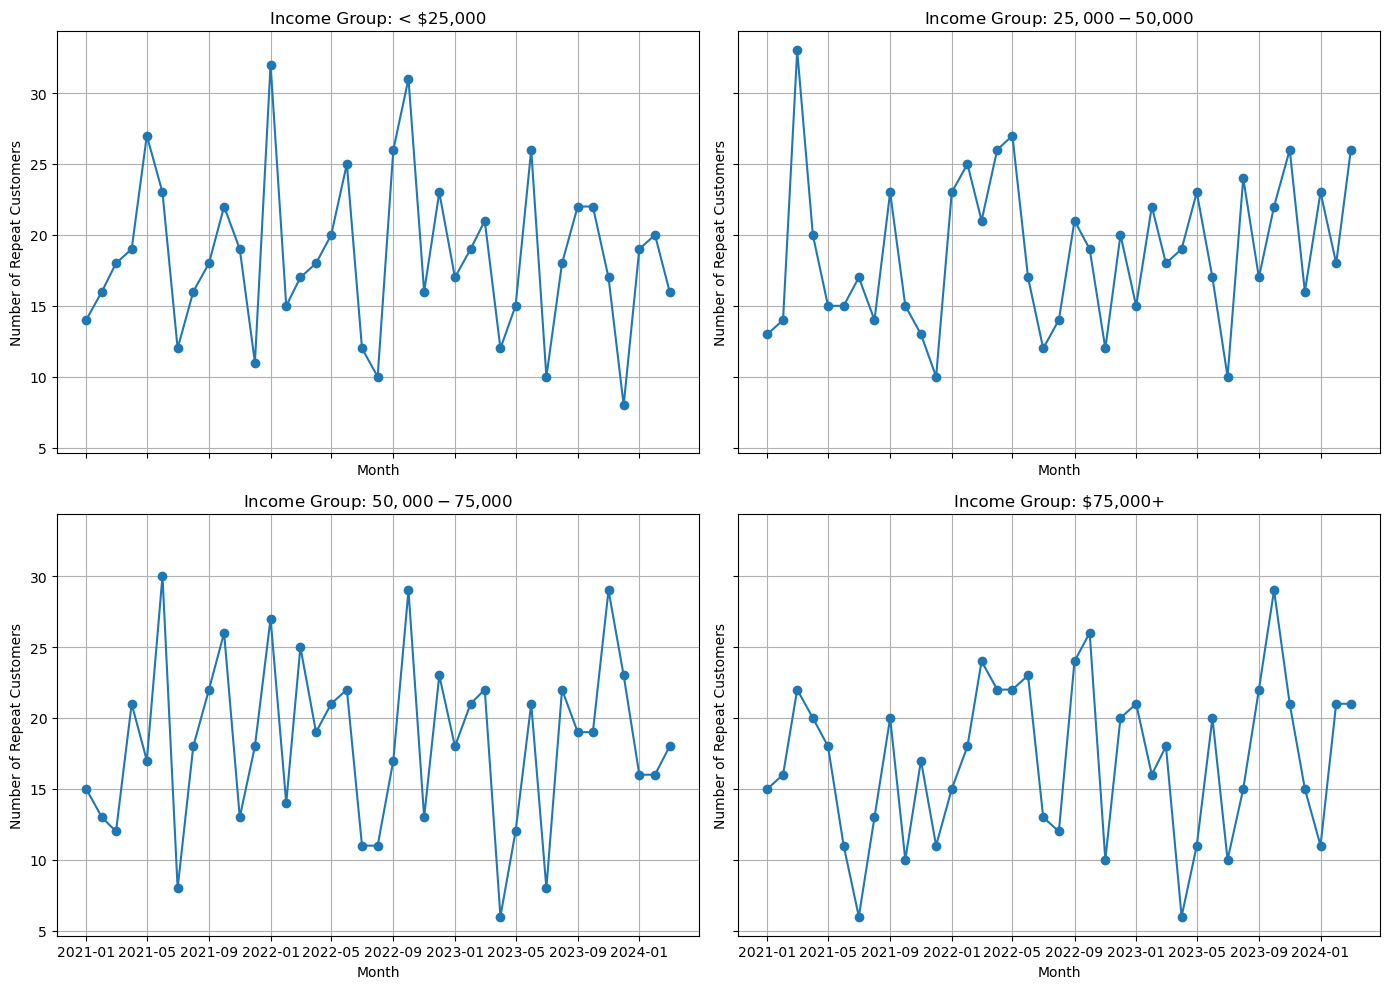

In [219]:
# Create subplots for each income group
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Iterate over each income group
for i, income_group in enumerate(['< $25,000', '$25,000 - $50,000', '$50,000 - $75,000', '$75,000+']):
    # Filter data for repeat customers and the specific income group
    repeat_customers_income_group = repeat_customers_data[repeat_customers_data['Income Group'] == income_group]
    # Group by month and count the number of repeat customers
    monthly_repeat_customers_income_group = repeat_customers_income_group.groupby('Month').size()
    # Plot the frequency of repeat customers for the current income group
    axs[i//2, i%2].plot(monthly_repeat_customers_income_group.index, monthly_repeat_customers_income_group, marker='o')
    axs[i//2, i%2].set_title(f'Income Group: {income_group}')
    axs[i//2, i%2].set_xlabel('Month')
    axs[i//2, i%2].set_ylabel('Number of Repeat Customers')
    axs[i//2, i%2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [220]:
# Selecting the columns of interest
columns_of_interest = ['Age Group', 'Region', 'Race/Ethnicity', 'Income Group', 'Language']

# Running describe() for each column
for column in columns_of_interest:
    print(f"Statistics for column: {column}")
    print(sales_df[column].describe())
    print("\n")

Statistics for column: Age Group
count      5918
unique        5
top       45-64
freq       1232
Name: Age Group, dtype: object


Statistics for column: Region
count        5918
unique          4
top       Midwest
freq         1543
Name: Region, dtype: object


Statistics for column: Race/Ethnicity
count      4419
unique        6
top       White
freq        771
Name: Race/Ethnicity, dtype: object


Statistics for column: Income Group
count                  5918
unique                    4
top       $50,000 - $75,000
freq                   1510
Name: Income Group, dtype: object


Statistics for column: Language
count        5918
unique          3
top       English
freq         5039
Name: Language, dtype: object




In [225]:
print("Data type of counts:", type(counts))
print("Data type of uniques:", type(uniques))
print("Data type of freqs:", type(freqs))
print("Data type of tops:", type(tops))


Data type of counts: <class 'list'>
Data type of uniques: <class 'list'>
Data type of freqs: <class 'list'>
Data type of tops: <class 'list'>


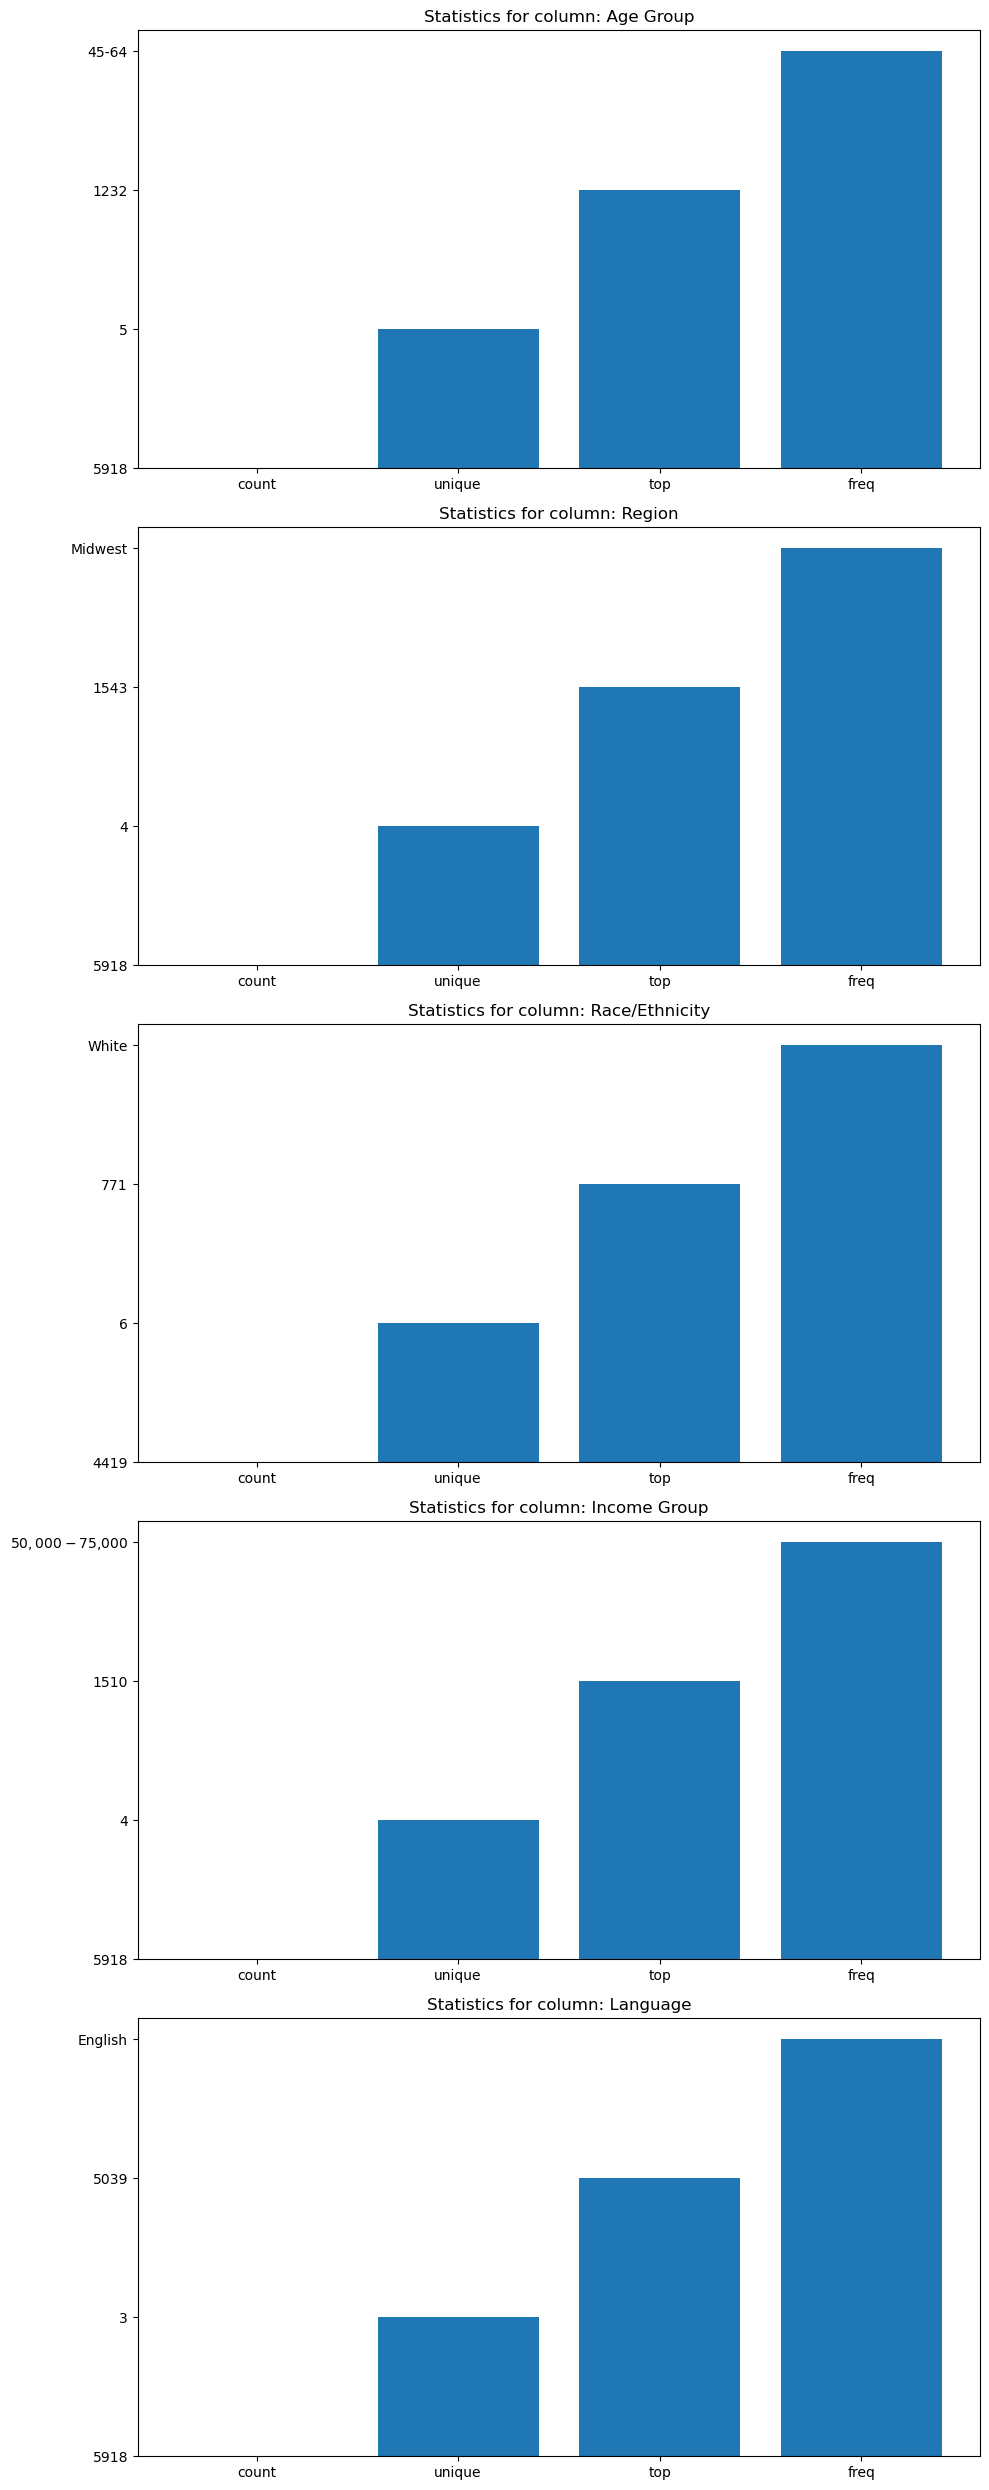

In [226]:
def plot_statistics(columns, counts, uniques, freqs, tops):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, len(columns) * 5))
    for i, column in enumerate(columns):
        ax = axes[i]
        # Convert numeric values to strings
        values = [str(counts[i]), str(uniques[i]), str(freqs[i]), str(tops[i])]
        ax.bar(['count', 'unique', 'top', 'freq'], values)
        ax.set_title(f"Statistics for column: {column}")
    plt.tight_layout()

# Call the function with the appropriate arguments
plot_statistics(columns, counts, uniques, freqs, tops)
plt.show()


In [229]:
CustomerID = 'Customer ID'
PurchaseDate = 'Date'
ChurnThreshold = 90  # Define your churn threshold (e.g., 90 days without a purchase)

# Sort DataFrame by 'CustomerID' and 'PurchaseDate'
sales_df_sorted = sales_df.sort_values(by=[CustomerID, PurchaseDate])

# Calculate the last purchase date for each customer
last_purchase_date = sales_df_sorted.groupby(CustomerID)[PurchaseDate].max()

# Calculate the current date
current_date = pd.to_datetime('today')

# Calculate the number of days since the last purchase for each customer
days_since_last_purchase = current_date - last_purchase_date

# Identify churned customers based on the churn threshold
churned_customers = days_since_last_purchase[days_since_last_purchase >= pd.Timedelta(days=ChurnThreshold)].index

# Calculate churn rate
churn_rate = len(churned_customers) / len(sales_df_sorted[CustomerID].unique()) * 100

print("Churn Rate: {:.2f}%".format(churn_rate))
print("Churned Customers:")
print(churned_customers)

Churn Rate: 87.27%
Churned Customers:
Index(['C1003', 'C1005', 'C1007', 'C1008', 'C1009', 'C1010', 'C1015', 'C1017',
       'C1018', 'C1019',
       ...
       'C9973', 'C9976', 'C9978', 'C9979', 'C9980', 'C9984', 'C9989', 'C9992',
       'C9996', 'C9998'],
      dtype='object', name='Customer ID', length=3777)


In [234]:
# Step 1: Convert 'Month' column to timestamp type
sales_df['Month'] = sales_df['Month'].dt.to_timestamp()

# Step 2: Determine the last purchase month for each customer
last_purchase_month = sales_df.groupby('Customer ID')['Month'].max()

# Step 3: Define churn condition
churn_condition = last_purchase_month < (last_purchase_month.max() - pd.DateOffset(months=6))

# Step 4: Create 'churn' column
sales_df['Churned'] = churn_condition

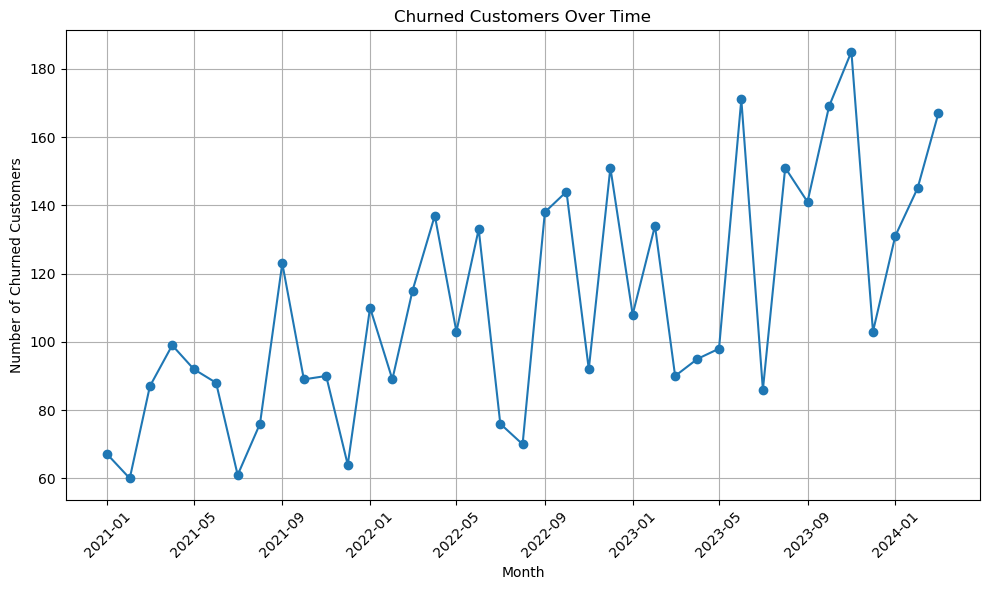

In [235]:
# Plotting the churned customers count over time
plt.figure(figsize=(10, 6))
plt.plot(last_purchase_month.value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Churned Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

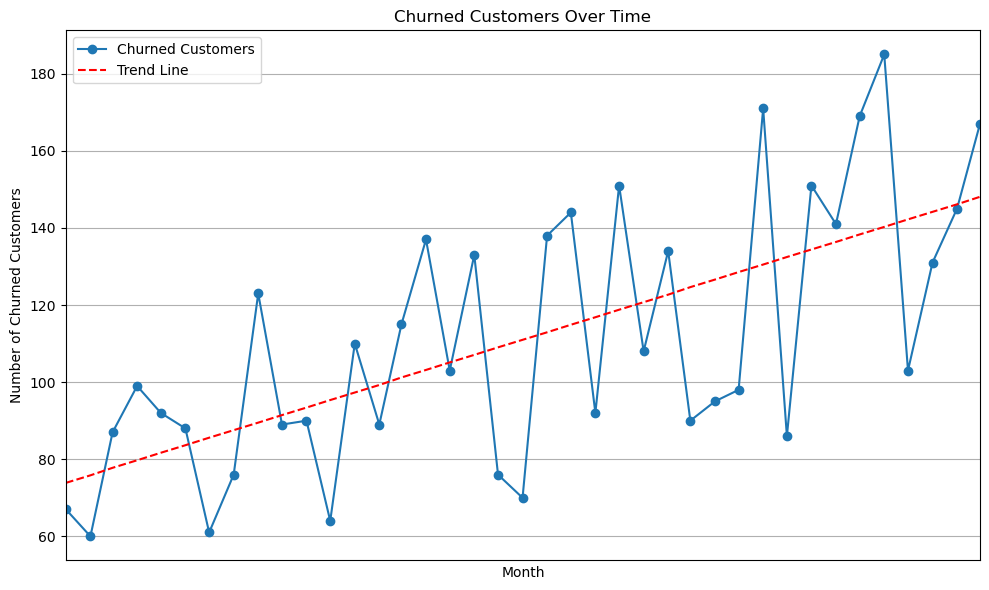

In [243]:
# Get the x and y data
x_data = np.arange(len(last_purchase_month.value_counts().sort_index()))
y_data = last_purchase_month.value_counts().sort_index().values

# Fit a linear regression model
model = LinearRegression().fit(x_data.reshape(-1, 1), y_data)

# Predict y values using the model
y_pred = model.predict(x_data.reshape(-1, 1))

# Plotting the churned customers count and trend line over time
plt.figure(figsize=(10, 6))
plt.plot(last_purchase_month.value_counts().sort_index(), marker='o', linestyle='-', label='Churned Customers')
plt.plot(last_purchase_month.value_counts().sort_index().index, y_pred, linestyle='--', color='red', label='Trend Line')
plt.title('Churned Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Churned Customers')
plt.xticks(ticks=np.arange(len(last_purchase_month.value_counts().sort_index())), 
           labels=last_purchase_month.value_counts().sort_index().index.strftime('%Y-%m'), rotation=45)
plt.grid(True)
plt.legend()

# Adjust x-axis limits to start from January 2021
start_date = pd.Timestamp('2021-01-01')
end_date = last_purchase_month.value_counts().sort_index().index[-1]
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

The above is a short-sighted definition of "churn" - measured only on a monthly basis. This isn't very useful. We will rework the definition and try to graph customers who haven't bought in 6 months or more.

In [259]:
# Drop the existing 'Churned' column
sales_df.drop(columns=['Churned'], inplace=True)

# Define a function to generate the churn indicator
def generate_churn_indicator(df, threshold_months=3):
    # Calculate the last purchase date for each customer
    last_purchase_date = df.groupby('Customer ID')['Date'].max().reset_index()
    last_purchase_date.columns = ['Customer ID', 'Last Purchase Date']
    
    # Merge the last purchase date back into the DataFrame
    df_merge = pd.merge(df, last_purchase_date, on='Customer ID', how='left')
    
    # Generate churn indicator for each customer based on the last purchase date
    churn_indicator = (df_merge['Last Purchase Date'] < df_merge['Month'] - pd.DateOffset(months=threshold_months)).astype(int)
    
    return churn_indicator

# Generate the churn indicator
churn_indicator = generate_churn_indicator(sales_df)

# Add the churn indicator as a new column in the DataFrame
sales_df['Churned'] = churn_indicator

# Display the DataFrame to verify the new 'Churned' column
sales_df.head()


,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Category,Date,Customer Type,Repeat Customers,Clean Category,Churned
0,2021-01-01,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[Ladies' Hats, Clothing Articles]",2021-01-26,Repeat Customer,1,Ladies' Hats,0
1,2021-01-01,C3602,25-34,West,Native American,"< $25,000",English,[Men's Fashion],2021-01-05,nan,0,Men's Fashion,0
2,2021-01-01,C2397,25-34,Northeast,Native American,"< $25,000",English,"[Ladies' Hats, Hats, Hats]",2021-01-31,Repeat Customer,1,Ladies' Hats,0
3,2021-01-01,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[Shoes, Shoes]",2021-01-25,nan,0,Shoes,0
4,2021-01-01,C7763,18-24,South,None,"$50,000 - $75,000",English,"[Hats, Clothing Articles, Shoes]",2021-01-03,nan,0,Hats,0


In [299]:
# Step 1: Calculate the current date
current_date = pd.to_datetime('today')

# Step 2: Find the last purchase date for each customer
last_purchase_date = sales_df.groupby('Customer ID')['Date'].max()

# Step 3: Calculate the time elapsed since the last purchase for each customer
time_since_last_purchase = current_date - last_purchase_date

# Step 4: Identify customers who haven't made any purchases in more than 6 months
churned_customers = time_since_last_purchase > pd.Timedelta(days=6*30)  # Assuming 30 days in a month

# Display churned customers
print("Churned Customers:")
print(churned_customers[churned_customers].index)


Churned Customers:
Index(['C1003', 'C1005', 'C1007', 'C1008', 'C1009', 'C1010', 'C1015', 'C1017',
       'C1018', 'C1019',
       ...
       'C9973', 'C9976', 'C9978', 'C9979', 'C9980', 'C9984', 'C9989', 'C9992',
       'C9996', 'C9998'],
      dtype='object', name='Customer ID', length=3287)


In [295]:
# Display the churned_customers DataFrame
print(churned_customers)


Customer ID
C1003     True
C1005     True
C1006    False
C1007     True
C1008     True
         ...  
C9992     True
C9993    False
C9996     True
C9998     True
C9999    False
Name: Date, Length: 4328, dtype: bool


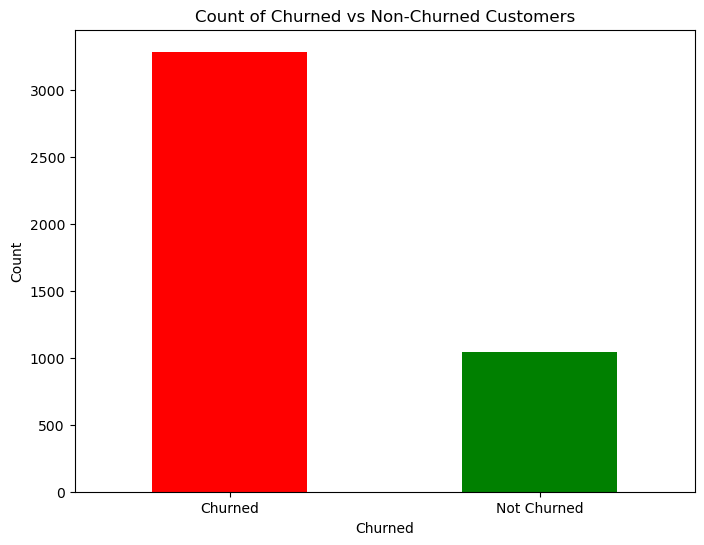

In [296]:
# Count the number of churned and non-churned customers
churned_counts = churned_customers.value_counts()

# Plotting the counts
plt.figure(figsize=(8, 6))
churned_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Count of Churned vs Non-Churned Customers')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.xticks([0, 1], ['Churned', 'Not Churned'], rotation=0)
plt.show()


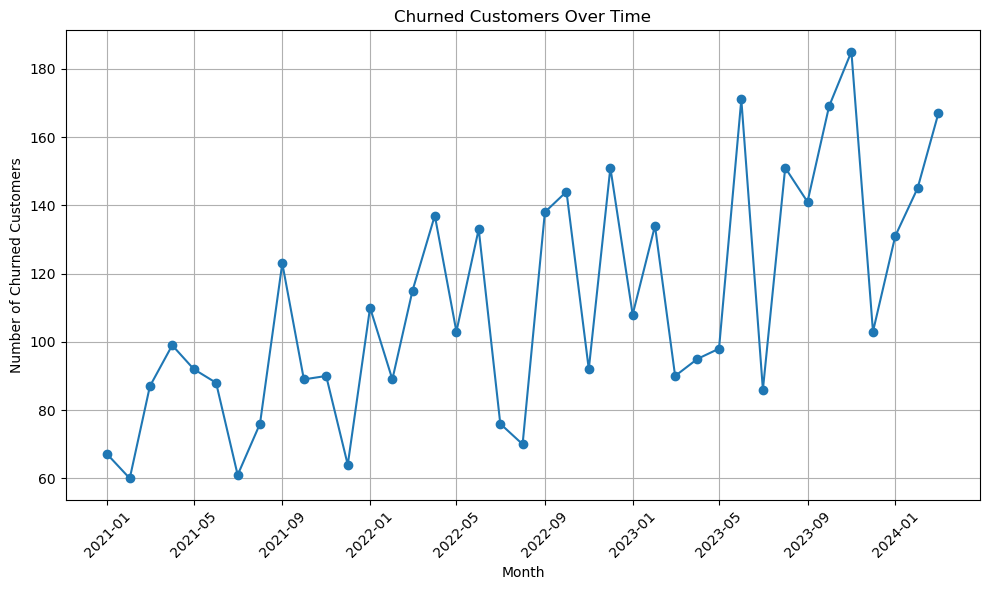

In [270]:
# Plotting the churned customers count over time
plt.figure(figsize=(10, 6))
plt.plot(last_purchase_month.value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Churned Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

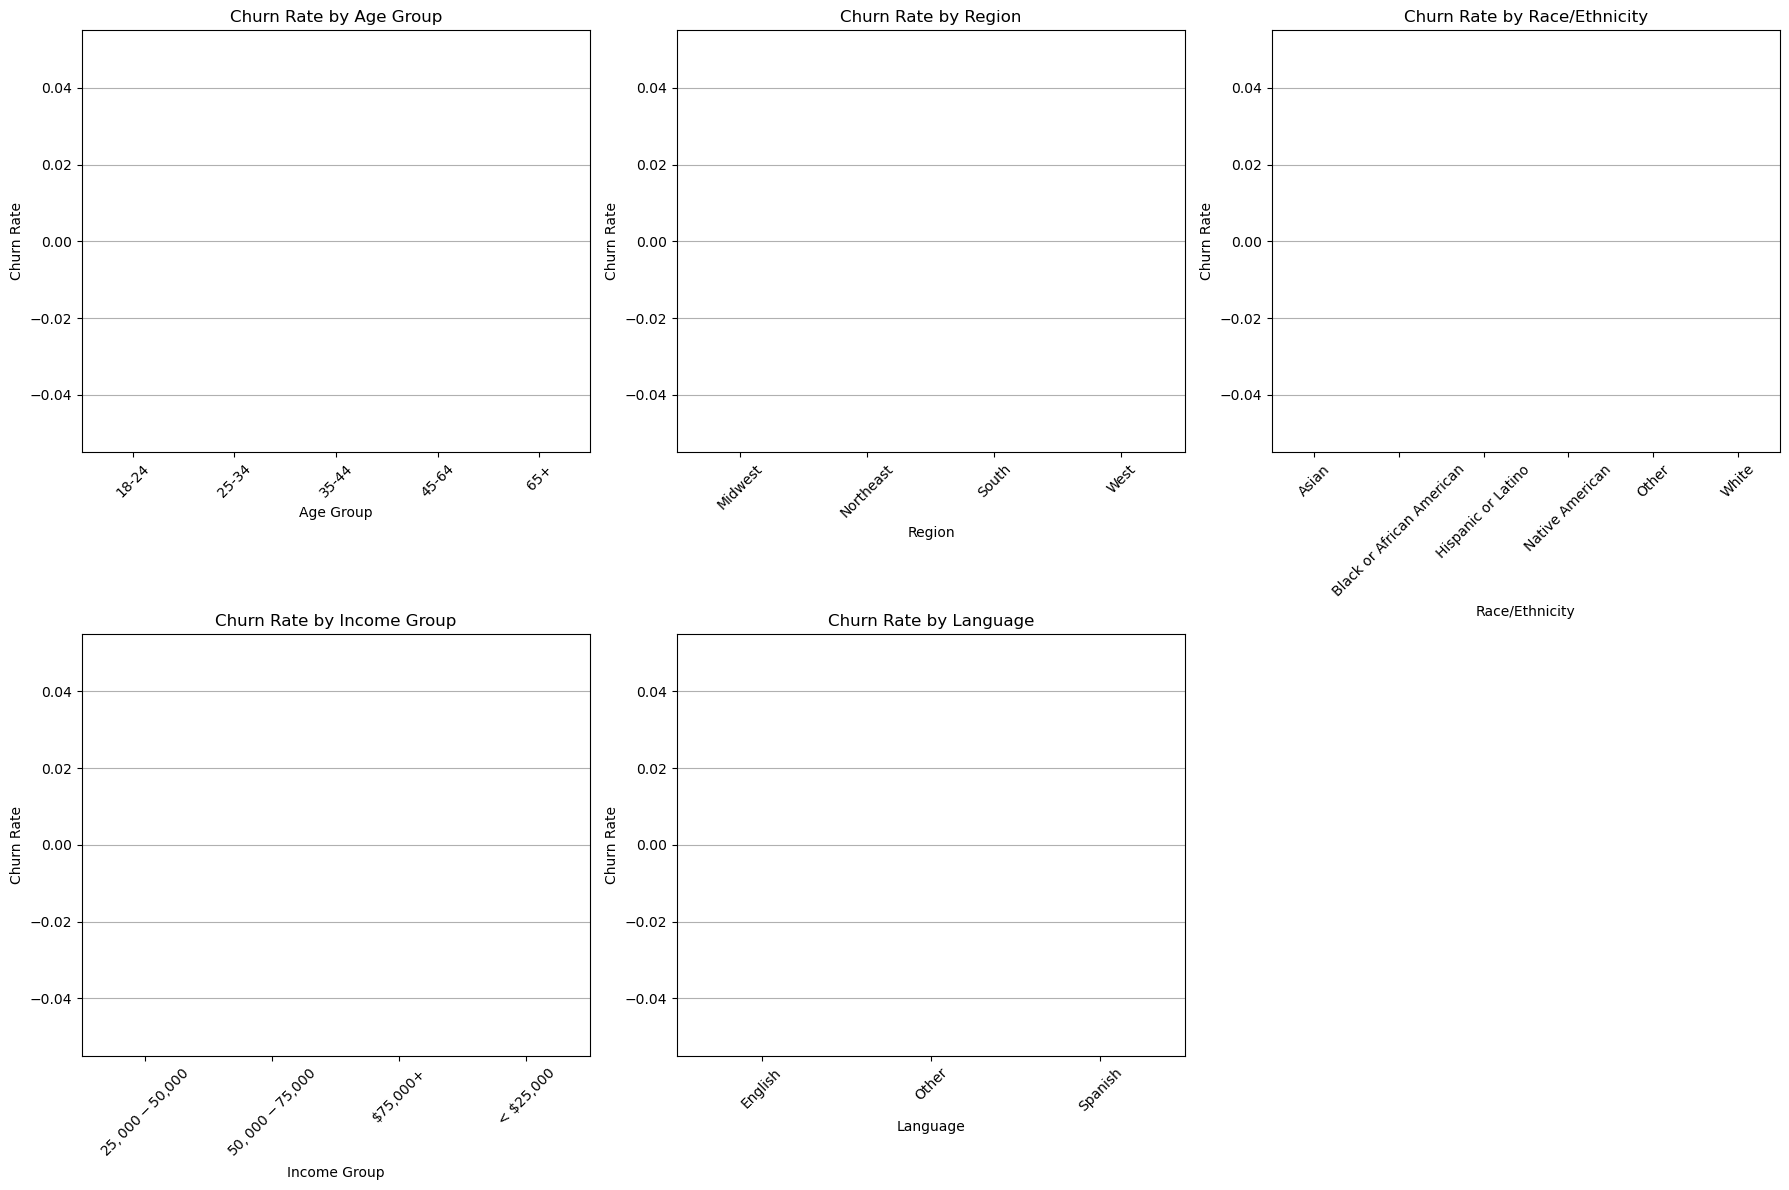

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter churned customers
churned_customers = sales_df[sales_df['Churned'] == 1]

# Group by demographic variables and calculate churn rate
churn_rate_by_age_group = churned_customers.groupby('Age Group').size() / sales_df.groupby('Age Group').size()
churn_rate_by_region = churned_customers.groupby('Region').size() / sales_df.groupby('Region').size()
churn_rate_by_race_ethnicity = churned_customers.groupby('Race/Ethnicity').size() / sales_df.groupby('Race/Ethnicity').size()
churn_rate_by_income_group = churned_customers.groupby('Income Group').size() / sales_df.groupby('Income Group').size()
churn_rate_by_language = churned_customers.groupby('Language').size() / sales_df.groupby('Language').size()

# Visualize the results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar plot of churn rate by age group
churn_rate_by_age_group.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Churn Rate')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y')

# Bar plot of churn rate by region
churn_rate_by_region.plot(kind='bar', color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Churn Rate')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y')

# Bar plot of churn rate by race/ethnicity
churn_rate_by_race_ethnicity.plot(kind='bar', color='lightgreen', ax=axes[0, 2])
axes[0, 2].set_title('Churn Rate by Race/Ethnicity')
axes[0, 2].set_xlabel('Race/Ethnicity')
axes[0, 2].set_ylabel('Churn Rate')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y')

# Bar plot of churn rate by income group
churn_rate_by_income_group.plot(kind='bar', color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Income Group')
axes[1, 0].set_xlabel('Income Group')
axes[1, 0].set_ylabel('Churn Rate')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y')

# Bar plot of churn rate by language
churn_rate_by_language.plot(kind='bar', color='lightskyblue', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Language')
axes[1, 1].set_xlabel('Language')
axes[1, 1].set_ylabel('Churn Rate')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [286]:
churned_customers

Customer ID
C1003     True
C1005     True
C1006    False
C1007     True
C1008     True
         ...  
C9992     True
C9993    False
C9996     True
C9998     True
C9999    False
Name: Date, Length: 4328, dtype: bool

In [287]:
# Check the columns in the merged DataFrame
print(merged_df.columns)


Index(['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity',
       'Income Group', 'Language', 'Category', 'Date_x', 'Customer Type',
       'Repeat Customers', 'Clean Category', 'Churned', 'Date_y'],
      dtype='object')


In [298]:
# Convert 'Churned' column to integers
sales_df['Churned'] = sales_df['Churned'].astype(int)

# Group sales DataFrame by desired demographic category and count churned customers
churn_counts_by_age_group = sales_df.groupby('Age Group')['Churned'].sum()
churn_counts_by_region = sales_df.groupby('Region')['Churned'].sum()
churn_counts_by_race_ethnicity = sales_df.groupby('Race/Ethnicity')['Churned'].sum()
churn_counts_by_income_group = sales_df.groupby('Income Group')['Churned'].sum()
churn_counts_by_language = sales_df.groupby('Language')['Churned'].sum()

# Print churn counts by demographic category
print("Churn Counts by Age Group:")
print(churn_counts_by_age_group)

print("\nChurn Counts by Region:")
print(churn_counts_by_region)

print("\nChurn Counts by Race/Ethnicity:")
print(churn_counts_by_race_ethnicity)

print("\nChurn Counts by Income Group:")
print(churn_counts_by_income_group)

print("\nChurn Counts by Language:")
print(churn_counts_by_language)


Churn Counts by Age Group:
Age Group
18-24    0
25-34    0
35-44    0
45-64    0
65+      0
Name: Churned, dtype: int32

Churn Counts by Region:
Region
Midwest      0
Northeast    0
South        0
West         0
Name: Churned, dtype: int32

Churn Counts by Race/Ethnicity:
Race/Ethnicity
Asian                        0
Black or African American    0
Hispanic or Latino           0
Native American              0
Other                        0
White                        0
Name: Churned, dtype: int32

Churn Counts by Income Group:
Income Group
$25,000 - $50,000    0
$50,000 - $75,000    0
$75,000+             0
< $25,000            0
Name: Churned, dtype: int32

Churn Counts by Language:
Language
English    0
Other      0
Spanish    0
Name: Churned, dtype: int32


In [300]:
sales_df.head()

,Month,Customer ID,Age Group,Region,Race/Ethnicity,Income Group,Language,Category,Date,Customer Type,Repeat Customers,Clean Category,Churned
0,2021-01-01,C3810,65+,Midwest,Hispanic or Latino,"$50,000 - $75,000",English,"[Ladies' Hats, Clothing Articles]",2021-01-26,Repeat Customer,1,Ladies' Hats,0
1,2021-01-01,C3602,25-34,West,Native American,"< $25,000",English,[Men's Fashion],2021-01-05,nan,0,Men's Fashion,0
2,2021-01-01,C2397,25-34,Northeast,Native American,"< $25,000",English,"[Ladies' Hats, Hats, Hats]",2021-01-31,Repeat Customer,1,Ladies' Hats,0
3,2021-01-01,C7764,35-44,South,Asian,"$50,000 - $75,000",English,"[Shoes, Shoes]",2021-01-25,nan,0,Shoes,0
4,2021-01-01,C7763,18-24,South,None,"$50,000 - $75,000",English,"[Hats, Clothing Articles, Shoes]",2021-01-03,nan,0,Hats,0


In [301]:
# Convert 'Churned' column to integers
sales_df['Churned'] = sales_df['Churned'].astype(int)

# Group sales DataFrame by desired demographic category and count churned customers
churn_counts_by_age_group = sales_df.groupby('Age Group')['Churned'].sum()
churn_counts_by_region = sales_df.groupby('Region')['Churned'].sum()
churn_counts_by_race_ethnicity = sales_df.groupby('Race/Ethnicity')['Churned'].sum()
churn_counts_by_income_group = sales_df.groupby('Income Group')['Churned'].sum()
churn_counts_by_language = sales_df.groupby('Language')['Churned'].sum()

# Print churn counts by demographic category
print("Churn Counts by Age Group:")
print(churn_counts_by_age_group)

print("\nChurn Counts by Region:")
print(churn_counts_by_region)

print("\nChurn Counts by Race/Ethnicity:")
print(churn_counts_by_race_ethnicity)

print("\nChurn Counts by Income Group:")
print(churn_counts_by_income_group)

print("\nChurn Counts by Language:")
print(churn_counts_by_language)


Churn Counts by Age Group:
Age Group
18-24    0
25-34    0
35-44    0
45-64    0
65+      0
Name: Churned, dtype: int32

Churn Counts by Region:
Region
Midwest      0
Northeast    0
South        0
West         0
Name: Churned, dtype: int32

Churn Counts by Race/Ethnicity:
Race/Ethnicity
Asian                        0
Black or African American    0
Hispanic or Latino           0
Native American              0
Other                        0
White                        0
Name: Churned, dtype: int32

Churn Counts by Income Group:
Income Group
$25,000 - $50,000    0
$50,000 - $75,000    0
$75,000+             0
< $25,000            0
Name: Churned, dtype: int32

Churn Counts by Language:
Language
English    0
Other      0
Spanish    0
Name: Churned, dtype: int32


In [302]:
# Step 1: Calculate the current date
current_date = pd.to_datetime('today')

# Step 2: Find the last purchase date for each customer
last_purchase_date = sales_df.groupby('Customer ID')['Date'].max()

# Step 3: Calculate the time elapsed since the last purchase for each customer
time_since_last_purchase = current_date - last_purchase_date

# Step 4: Identify customers who haven't made any purchases in more than 6 months
churned_customers = time_since_last_purchase > pd.Timedelta(days=6*30)  # Assuming 30 days in a month

# Display churned customers
print("Churned Customers:")
print(churned_customers[churned_customers].index)


Churned Customers:
Index(['C1003', 'C1005', 'C1007', 'C1008', 'C1009', 'C1010', 'C1015', 'C1017',
       'C1018', 'C1019',
       ...
       'C9973', 'C9976', 'C9978', 'C9979', 'C9980', 'C9984', 'C9989', 'C9992',
       'C9996', 'C9998'],
      dtype='object', name='Customer ID', length=3287)


In [308]:
churned_customers

Customer ID
C1003     True
C1005     True
C1006    False
C1007     True
C1008     True
         ...  
C9992     True
C9993    False
C9996     True
C9998     True
C9999    False
Name: Date, Length: 4328, dtype: bool

In [305]:
# Check the current columns in the DataFrame
print(sales_df.columns)

Index(['Month', 'Customer ID', 'Age Group', 'Region', 'Race/Ethnicity',
       'Income Group', 'Language', 'Category', 'Date_x', 'Customer Type',
       'Repeat Customers', 'Clean Category', 'Old Churned', 'Date_y'],
      dtype='object')


In [306]:
# Rename 'Old Churned' column to 'Churned'
sales_df.rename(columns={'Old Churned': 'Churned'}, inplace=True)

# Fill NaN values in 'Churned' column with False assuming NaN indicates non-churned customers
sales_df['Churned'].fillna(False, inplace=True)

# Display the updated DataFrame
print(sales_df.head())


       Month Customer ID Age Group     Region      Race/Ethnicity  \
0 2021-01-01       C3810       65+    Midwest  Hispanic or Latino   
1 2021-01-01       C3602     25-34       West     Native American   
2 2021-01-01       C2397     25-34  Northeast     Native American   
3 2021-01-01       C7764     35-44      South               Asian   
4 2021-01-01       C7763     18-24      South                None   

        Income Group Language                           Category     Date_x  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers Clean Category  Churned  Date_y  
0  Repeat Customer                 1   

In [307]:
# Rename 'Churned' column to 'Old Churned'
sales_df.rename(columns={'Churned': 'Old Churned'}, inplace=True)

# Display the updated DataFrame
print(sales_df.head())


       Month Customer ID Age Group     Region      Race/Ethnicity  \
0 2021-01-01       C3810       65+    Midwest  Hispanic or Latino   
1 2021-01-01       C3602     25-34       West     Native American   
2 2021-01-01       C2397     25-34  Northeast     Native American   
3 2021-01-01       C7764     35-44      South               Asian   
4 2021-01-01       C7763     18-24      South                None   

        Income Group Language                           Category     Date_x  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers Clean Category  Old Churned  Date_y  
0  Repeat Customer                 

In [309]:
# Assuming churned_customers is a Series containing churn information for each customer ID
# Add a new column 'Churned' to sales_df and populate it with churned_customers values
sales_df['Churned'] = churned_customers

# Display the updated DataFrame
print(sales_df.head())


       Month Customer ID Age Group     Region      Race/Ethnicity  \
0 2021-01-01       C3810       65+    Midwest  Hispanic or Latino   
1 2021-01-01       C3602     25-34       West     Native American   
2 2021-01-01       C2397     25-34  Northeast     Native American   
3 2021-01-01       C7764     35-44      South               Asian   
4 2021-01-01       C7763     18-24      South                None   

        Income Group Language                           Category     Date_x  \
0  $50,000 - $75,000  English  [Ladies' Hats, Clothing Articles] 2021-01-26   
1          < $25,000  English                    [Men's Fashion] 2021-01-05   
2          < $25,000  English         [Ladies' Hats, Hats, Hats] 2021-01-31   
3  $50,000 - $75,000  English                     [Shoes, Shoes] 2021-01-25   
4  $50,000 - $75,000  English   [Hats, Clothing Articles, Shoes] 2021-01-03   

     Customer Type  Repeat Customers Clean Category  Old Churned  Date_y  \
0  Repeat Customer                

In [310]:
# Check unique values in the 'Churned' column
unique_churn_values = sales_df['Churned'].unique()

# Print unique values
print(unique_churn_values)


[nan]


In [312]:
# Step 1: Calculate the current date
current_date = pd.to_datetime('today')

# Step 2: Find the last purchase date for each customer
last_purchase_date = sales_df.groupby('Customer ID')['Date_x'].max()

# Step 3: Calculate the time elapsed since the last purchase for each customer
time_since_last_purchase = current_date - last_purchase_date

# Step 4: Identify customers who haven't made any purchases in more than 6 months
churned_customers = time_since_last_purchase > pd.Timedelta(days=6*30)  # Assuming 30 days in a month

# Update the 'Churned' column in the DataFrame
sales_df['Churned'] = churned_customers

# Display churned customers
print("Churned Customers:")
print(sales_df.loc[sales_df['Churned'], 'Customer ID'])


Churned Customers:


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [314]:
# Step 1: Calculate the current date
current_date = pd.to_datetime('today')

# Step 2: Find the last purchase date for each customer
last_purchase_date = sales_df.groupby('Customer ID')['Date_x'].max()

# Step 3: Calculate the time elapsed since the last purchase for each customer
time_since_last_purchase = current_date - last_purchase_date

# Step 4: Identify customers who haven't made any purchases in more than 6 months
churned_customers = time_since_last_purchase > pd.Timedelta(days=6*30)  # Assuming 30 days in a month

# Update the 'Churned' column in the DataFrame, filling NaN values with False
sales_df['Churned'] = churned_customers.fillna(False)

# Display churned customers
print("Churned Customers:")
print(sales_df.loc[sales_df['Churned'], 'Customer ID'])


Churned Customers:


ValueError: Cannot mask with non-boolean array containing NA / NaN values